In [3]:
import pandas as pd 

In [4]:
known_shifts_df = pd.read_csv("/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Data/known_shifts.csv")
known_shifts_df

Term                                     Meaning Before  \
0      tinder          dry, flammable, wood, paper, ignite, fire   
1        zoom  move, quickly, rush, fast, race, camera, magni...   
2    telegram  message, letter, telegraph, written, printed, ...   
3      twitch  short, sudden, jerk, convulsion, movement, shi...   
4     discord  disagreement, strife, conflict, dispute, oppos...   
5       teams  group, players, game, sport, band, crew, toget...   
6       slack  loose, sluggish, lax, inactive, slow, negligen...   
7      stripe  band, colour, color, line, mark, belt, chevron...   
8        snap  break, sharp, quick, sudden, photo, bite, frea...   
9       swift  quick, prompt, rapid, fast, instant, bird, ban...   
10     bumble  awkward, confused, blunder, stumble, clumsy, s...   
11     medium  agency, channel, convey, transmitted, halfway,...   
12      hinge  door, pivot, joint, mechanism, connection, lin...   
13     notion  concept, idea, belief, thought, perception, un...   
14     signal  sign, indicator, gesture, warning, alert, cue,...   
15      azure  blue, sky, color, cloudless, purple, sapphire,...   
16       echo  sound, reflection, copysound, repetition, reso...   
17      alexa  name, personal, individual, character, unique,...   
18      prime  number, mathematics, peak, main, fundamental, ...   
19       edge  border, boundary, rim, end, corner, perimeter,...   
20       meta  abstract, self, referential, data, concept, th...   
21  lightning  electricity, bolt, flash, thunder, weather, en...   
22       eats  food, meal, consume, dining, nourishment, bite...   
23      spark  ignite, flame, flicker, glow, catalyst, inspir...   
24     corona  beer, sun, light, crown, light, astronomy, cir...   

                                        Meaning After   Shift Date  \
0   online, dating, application, matches,  users, ...   2012-09-12   
1   meeting, video, software, program, communicati...   2012-09-10   
2   messenger, freemium, cloud, instant, messaging...   2013-08-14   
3   video, live, streaming, service, game, broadca...   2011-06-06   
4   instant, messaging, platform, users, communica...   2015-05-13   
5   meeting, chat, collaboration, workspace, busin...   2017-03-14   
6   cloud, freemium, platform, instant, messaging,...   2013-08-01   
7   financial, service, software, company, payment...   2011-09-29   
8   multimedia, instant, messaging, app, service, ...   2011-07-08   
9   paradigm, compiled, programming, language, dev...   2014-06-02   
10  online, dating, networking, application, profi...   2014-12-02   
11  platform, article, content, writer, publish, b...   2012-08-15   
12  dating, relationship, app, swipe, match, socia...   2013-02-01   
13  workspace, collaboration, productivity, notes,...   2016-02-01   
14  encryption, messaging, privacy, secure, app, v...   2014-07-29   
15  cloud, platform, computing, service, infrastru...   2012-06-07   
16  smart, speaker, voice, control, automation, mu...   2014-11-06   
17  voice, assistant, smart, home, automation, com...   2014-11-06   
18  membership, shipping, streaming, video, delive...   2011-05-01   
19  browser, web, chrome, internet, tabs, search, ...   2015-07-29   
20  metaverse, brand, technology, augmented, reali...   2021-10-28   
21  connector, charge, plug, device, data, cable, ...   2012-09-12   
22  delivery, app, online, restaurant, service, ta...   2014-08-01   
23  big, data, analytics, cluster, computing, disk...   2014-05-26   
24  virus, pandemic, vaccine, mask, lockdown, infe...   2020-02-11   

                                      Reason  
0                            App launch date  
1                            App launch date  
2                            App launch date  
3                            Platform launch  
4                            App launch date  
5                                launch date  
6                            App launch date  
7                             Service launc

In [ ]:
# known_shifts_df.Term.tolist()

In [ ]:
# corpus_known_shifts_and_vegan = pd.read_csv(
#     "/pfs/work7/workspace/scratch/ma_sguliyev-Reddit_dumps/AskReddit_download/Askreddit_per_year_comments_splitted/df_at_least_one_term.csv", sep = "\t")
# corpus_known_shifts_and_vegan

In [ ]:
# import pandas as pd
# from gensim.models import Word2Vec
# import numpy as np

# # Load the DataFrame (assuming it's a CSV file)
# # corpus_known_shifts_and_vegan = pd.read_csv("your_dataframe.csv")

# # Convert 'created_utc' to datetime format and filter out the year 2008
# corpus_known_shifts_and_vegan['created_utc'] = pd.to_datetime(corpus_known_shifts_and_vegan['created_utc'])
# corpus_known_shifts_and_vegan = corpus_known_shifts_and_vegan[corpus_known_shifts_and_vegan['created_utc'].dt.year != 2008]

# # Identify the columns that have terms of interest
# term_cols = corpus_known_shifts_and_vegan.columns.difference(['id', 'created_utc', 'preprocessed_body'])

# # Replace terms in 'preprocessed_body' with term_year
# for index, row in corpus_known_shifts_and_vegan.iterrows():
#     if index % 1000 == 0:
#         print(index)
#     year = row['created_utc'].year
#     for term_col in term_cols:
#         term = term_col.split("_")[0]  # Assuming column names are term_count
#         token = f"{term}_{year}"
#         row['preprocessed_body'] = row['preprocessed_body'].replace(term, token)

# # Convert 'preprocessed_body' to a list of lists
# sentences = [text.split() for text in corpus_known_shifts_and_vegan['preprocessed_body']]

# # Get unique year-term tokens from the DataFrame
# unique_year_terms = {f"{term.split('_')[0]}_{year}" for term in term_cols for year in corpus_known_shifts_and_vegan['created_utc'].dt.year.unique()}



In [ ]:

import gensim

model = gensim.models.Word2Vec.load('/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_1.model')


In [ ]:
"teams" in model.wv.key_to_index

In [ ]:
df = known_shifts_df

term = 'teams'
before_words = df[df['Term'] == term]['Meaning Before'].values[0].split(', ')
after_words = df[df['Term'] == term]['Meaning After'].values[0].split(', ')

In [ ]:
# before_words = ["wood"]
# after_words = ["dating"]

In [ ]:
def compute_average_vector(words, model):
    vector_sum = 0
    count = 0
    for word in words:
        if word in model.wv.key_to_index:
            vector_sum += model.wv[word]
            count += 1
    return vector_sum / count if count != 0 else None

before_vector = compute_average_vector(before_words, model)
after_vector = compute_average_vector(after_words, model)


In [ ]:
projection_vector = after_vector - before_vector


In [ ]:
from scipy.spatial.distance import cosine

years = range(2009, 2023)
similarities = []
for year in years:
    term_year = f'{term}_{year}'
    if term_year in model.wv.key_to_index:
        term_vector = model.wv[term_year]
        similarity = 1 - cosine(projection_vector, term_vector)
        similarities.append(similarity)
    else:
        similarities.append(None)


In [ ]:
from scipy.stats import spearmanr

# Exclude None values for spearmanr
valid_indices = [i for i, val in enumerate(similarities) if val is not None]
valid_similarities = [similarities[i] for i in valid_indices]
valid_years = [years[i] for i in valid_indices]

correlation, p_value = spearmanr(valid_similarities, valid_years)


In [ ]:
correlation, p_value

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(valid_years, valid_similarities, marker='o')
m, b = np.polyfit(valid_years, valid_similarities, 1)  # Getting the slope and intercept
plt.plot(valid_years, m*np.array(valid_years) + b)  # Plotting the line
plt.ylim(min(valid_similarities), max(valid_similarities))
plt.xlabel('Year')
plt.ylabel('Similarity Score')
plt.title(f'Similarity Trend for Term: {term}')
plt.grid(True)
plt.show()


#### 1 term 1 model above

In [ ]:
import gensim
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np

# Function to compute average vector
def compute_average_vector(words, model):
    vector_sum = 0
    count = 0
    for word in words:
        if word in model.wv.key_to_index:
            vector_sum += model.wv[word]
            count += 1
    return vector_sum / count if count != 0 else None

# Define the term and get before and after words
df = known_shifts_df
term = 'medium'
before_words = df[df['Term'] == term]['Meaning Before'].values[0].split(', ')
after_words = df[df['Term'] == term]['Meaning After'].values[0].split(', ')

# List to collect all similarity scores and year values
all_similarities = []
all_years = []

# Assume model numbers go from 1 to N
N = 3  # Adjust this to the correct number of models
for i in range(1, N+1):
    # Load each model
    model_path = f'/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_{i}.model'
    model = gensim.models.Word2Vec.load(model_path)
    
    # Compute before and after vectors
    before_vector = compute_average_vector(before_words, model)
    after_vector = compute_average_vector(after_words, model)
    if before_vector is None or after_vector is None:
        continue  # Skip to next iteration if either vector is None
    
    # Compute projection vector
    projection_vector = after_vector - before_vector
    
    # Compute similarities for each year
    years = range(2009, 2023)
    similarities = []
    for year in years:
        term_year = f'{term}_{year}'
        if term_year in model.wv.key_to_index:
            term_vector = model.wv[term_year]
            similarity = 1 - cosine(projection_vector, term_vector)
            similarities.append(similarity)
        else:
            similarities.append(None)
    
    # Extend the collected data lists
    all_similarities.extend(similarities)
    all_years.extend(years)

# Exclude None values for spearmanr
valid_indices = [i for i, val in enumerate(all_similarities) if val is not None]
valid_similarities = [all_similarities[i] for i in valid_indices]
valid_years = [all_years[i] for i in valid_indices]

# Compute correlation and p-value
correlation, p_value = spearmanr(valid_similarities, valid_years)
print(correlation, p_value)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(valid_years, valid_similarities, marker='o', linestyle='', alpha=0.5)  # Adjust alpha for better visualization
m, b = np.polyfit(valid_years, valid_similarities, 1)  # Getting the slope and intercept
plt.plot(valid_years, m*np.array(valid_years) + b)  # Plotting the line
plt.ylim(min(valid_similarities), max(valid_similarities))
plt.xlabel('Year')
plt.ylabel('Similarity Score')
plt.title(f'Similarity Trend for Term: {term}')
plt.grid(True)
plt.show()


## 1 term many models above


In [ ]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr, t, sem, pearsonr
from collections import defaultdict
plt.style.use("default")

# Function to compute average vector
def compute_average_vector(words, model):
    vector_sum = 0
    count = 0
    for word in words:
        if word in model.wv.key_to_index:
            vector_sum += model.wv[word]
            count += 1
    return vector_sum / count if count != 0 else None

# Define years range
years = range(2009, 2023)

# Assume model numbers go from 1 to N
N = 9  # Adjust this to the correct number of models

# Lists to collect all similarity scores and year values for dataset-wide analysis
all_similarities = []
all_years = []

# Iterate through all terms
for index, row in known_shifts_df.iterrows():
    term = row['Term']
    before_words = row['Meaning Before'].split(', ')
    after_words = row['Meaning After'].split(', ')
    
    # Dictionary to collect term-specific similarity scores grouped by year
    term_similarities_by_year = defaultdict(list)

    for i in range(1, N+1):
        # Load each model
        model_path = f'/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_{i}.model'
        model = gensim.models.Word2Vec.load(model_path)

        # Compute before and after vectors
        before_vector = compute_average_vector(before_words, model)
        after_vector = compute_average_vector(after_words, model)
        if before_vector is None or after_vector is None:
            continue  # Skip to next iteration if either vector is None

        # Compute projection vector
        projection_vector = after_vector - before_vector

        # Compute similarities for each year
        for year in years:
            term_year = f'{term}_{year}'
            if term_year in model.wv.key_to_index:
                term_vector = model.wv[term_year]
                similarity = 1 - cosine(projection_vector, term_vector)
                term_similarities_by_year[year].append(similarity)
            else:
                term_similarities_by_year[year].append(None)

    # Prepare data for correlation analysis and plotting
    term_similarities = []
    term_years = []
    for year in years:
        term_similarities.extend(term_similarities_by_year[year])
        term_years.extend([year] * len(term_similarities_by_year[year]))

    # Exclude None values for spearmanr
    valid_indices = [i for i, val in enumerate(term_similarities) if val is not None]
    valid_similarities = [term_similarities[i] for i in valid_indices]
    valid_years = [term_years[i] for i in valid_indices]

    # Compute correlation and p-value for the term
    correlation, p_value = spearmanr(valid_similarities, valid_years)
    print(f'Spearman correlation for term {term}: {correlation}, p-value: {p_value}')

    # Extend the dataset-wide data lists
    all_similarities.extend(valid_similarities)
    all_years.extend(valid_years)

    # Plotting term-specific mean and 95% CI
    plt.figure(figsize=(10, 6))
    mean_similarities = [np.mean(term_similarities_by_year[year]) for year in years]
    stderr = [sem(term_similarities_by_year[year]) for year in years]
    ci = [s * t.ppf((1 + 0.95) / 2., len(term_similarities_by_year[year]) - 1) for s in stderr]
    plt.fill_between(years, (np.array(mean_similarities) - np.array(ci)), (np.array(mean_similarities) + np.array(ci)), color='b', alpha=.1)
    plt.plot(years, mean_similarities, color='b')
    plt.xlabel('Year')
    plt.ylabel('Mean Similarity Score')
    plt.title(f'Mean Similarity Trend with 95% CI for Term: {term}')
    plt.grid(True)
    plt.show()

# ... (previous code for individual term analysis)

# Dataset-wide correlation
dataset_correlation, dataset_p_value = spearmanr(all_similarities, all_years)
print(f'Dataset-wide Spearman correlation: {dataset_correlation}, p-value: {dataset_p_value}')

# Prepare data for dataset-wide mean and 95% CI plotting
dataset_similarities_by_year = defaultdict(list)

# Group the similarity scores by year
for i, year in enumerate(all_years):
    dataset_similarities_by_year[year].append(all_similarities[i])

# Calculate mean similarity and SEM for each year
dataset_mean_similarities = [np.mean(dataset_similarities_by_year[year]) for year in years]
dataset_stderr = [sem(dataset_similarities_by_year[year]) for year in years]

# Calculate the 95% CI for each year
dataset_ci = [s * t.ppf((1 + 0.95) / 2., len(dataset_similarities_by_year[year]) - 1) for s in dataset_stderr]

# Plotting dataset-wide mean and 95% CI
plt.figure(figsize=(10, 6))
plt.fill_between(years, (np.array(dataset_mean_similarities) - np.array(dataset_ci)), (np.array(dataset_mean_similarities) + np.array(dataset_ci)), color='b', alpha=.1)
plt.plot(years, dataset_mean_similarities, color='b')
plt.xlabel('Year')
plt.ylabel('Mean Similarity Score')
plt.title('Dataset-wide Mean Similarity Trend with 95% CI')
plt.grid(True)
plt.show()


## Random baselines below


In [4]:
# List of model paths
model_paths = [
    '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model',
    '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model',
    '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model'
]

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term tinder:
  Spearman Correlation: 0.8285714285714285, p-value: 0.000250534270865576
  Pearson Correlation: 0.8660217572572575, p-value: 6.217702916276488e-05
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term tinder:
  Spearman Correlation: 0.3230769230769231, p-value: 0.25987361950878973
  Pearson Correlation: 0.07898787139740353, p-value: 0.7883842200901879
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term tinder:
  Spearman Correlation: 0.7802197802197802, p-value: 0.0009944938002309496
  Pearson Correlation: 0.8499926490750259, p-value: 0.00011811597896176452


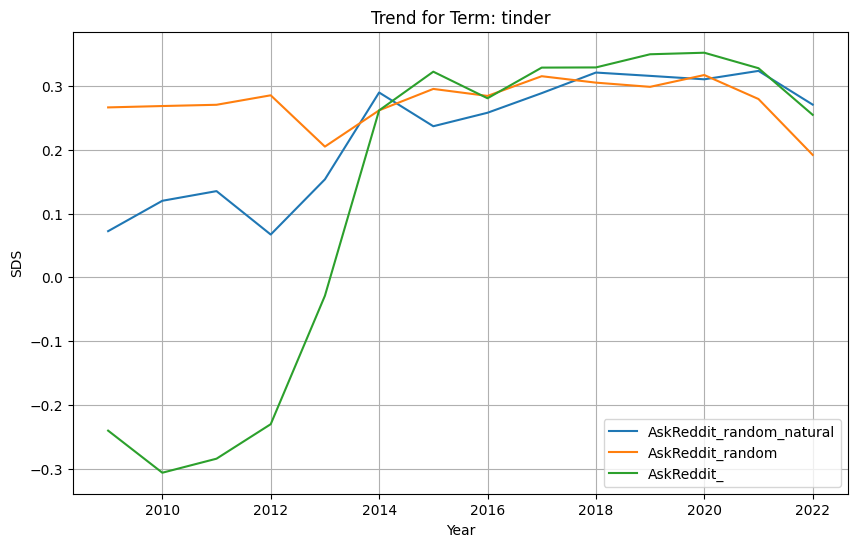

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term zoom:
  Spearman Correlation: -0.002197802197802198, p-value: 0.9940505286658998
  Pearson Correlation: -0.0553300558238869, p-value: 0.8509812406149649
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term zoom:
  Spearman Correlation: 0.17362637362637365, p-value: 0.5527669411422413
  Pearson Correlation: 0.09775654354106793, p-value: 0.7395368013195008
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term zoom:
  Spearman Correlation: 0.7010989010989012, p-value: 0.005211861769946939
  Pearson Correlation: 0.715829563320726, p-value: 0.003987920595763552


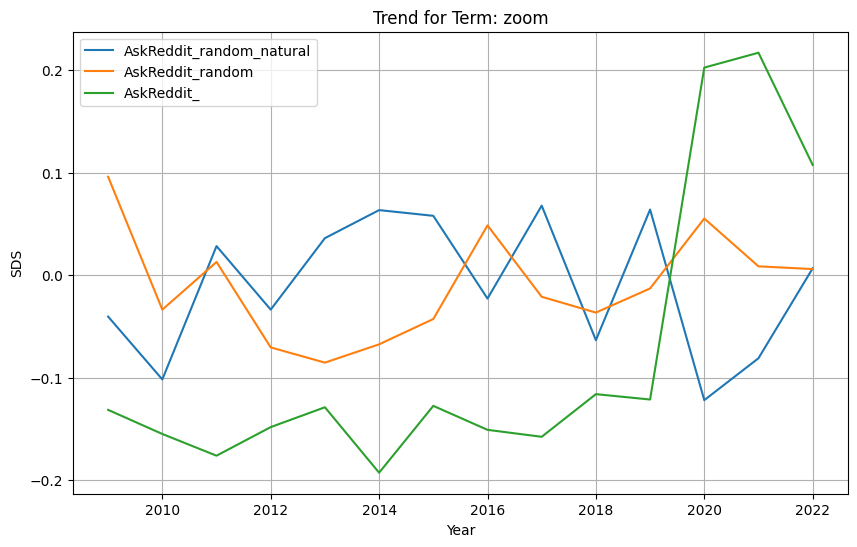

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term telegram:
  Spearman Correlation: -0.3494505494505495, p-value: 0.22068999774644735
  Pearson Correlation: -0.337030374893363, p-value: 0.23865486044111434
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term telegram:
  Spearman Correlation: -0.6527472527472528, p-value: 0.01138457399795419
  Pearson Correlation: -0.6794397234594985, p-value: 0.007523144463853475
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term telegram:
  Spearman Correlation: 0.621978021978022, p-value: 0.017550315290540047
  Pearson Correlation: 0.6011008300627241, p-value: 0.02299008538837029


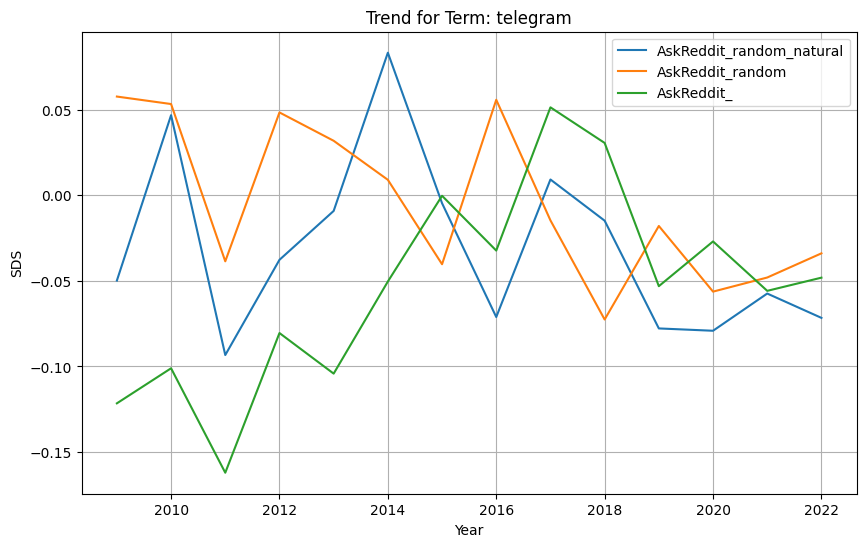

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term twitch:
  Spearman Correlation: -0.44175824175824174, p-value: 0.11377750302872344
  Pearson Correlation: -0.3360413434728274, p-value: 0.24012275112376602
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term twitch:
  Spearman Correlation: 0.38461538461538464, p-value: 0.17450875077509556
  Pearson Correlation: 0.3423156286170473, p-value: 0.23090402251845743
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term twitch:
  Spearman Correlation: 0.9604395604395607, p-value: 5.081053892329076e-08
  Pearson Correlation: 0.923454324024916, p-value: 2.4586135566018954e-06


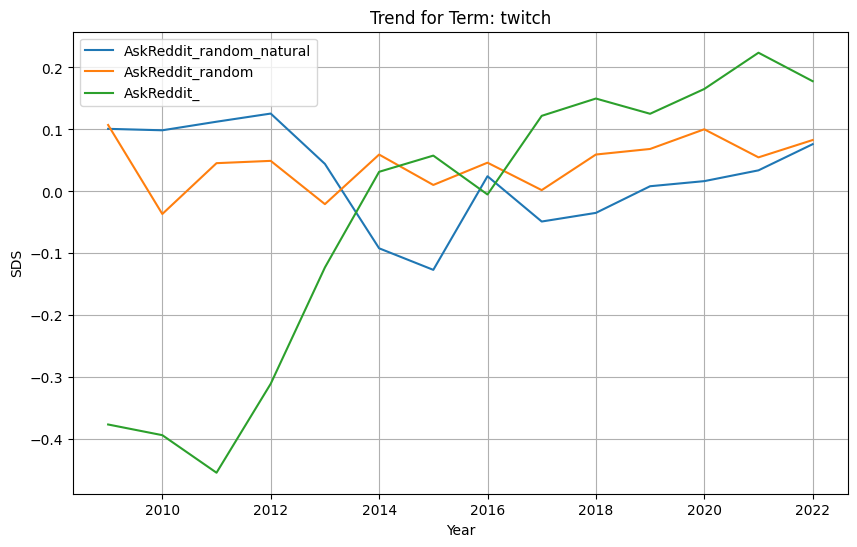

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term discord:
  Spearman Correlation: 0.6351648351648352, p-value: 0.01465788132728914
  Pearson Correlation: 0.6586939040478865, p-value: 0.01041559847019762
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term discord:
  Spearman Correlation: -0.1252747252747253, p-value: 0.6695823965448444
  Pearson Correlation: -0.2531873128064146, p-value: 0.3824591059685361
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term discord:
  Spearman Correlation: 0.8989010989010989, p-value: 1.2358700865600781e-05
  Pearson Correlation: 0.9105691230249323, p-value: 6.0771176364019305e-06


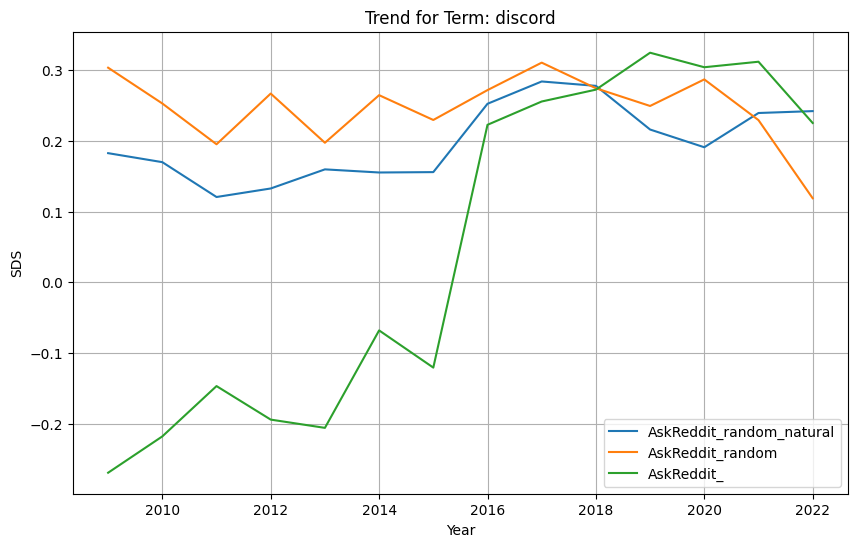

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term teams:
  Spearman Correlation: -0.5780219780219781, p-value: 0.030383014145236965
  Pearson Correlation: -0.5951754887229117, p-value: 0.024742739791278688
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term teams:
  Spearman Correlation: -0.15164835164835166, p-value: 0.6047905984521367
  Pearson Correlation: -0.18124762933326594, p-value: 0.5351858421661234
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term teams:
  Spearman Correlation: 0.389010989010989, p-value: 0.16921738979769044
  Pearson Correlation: 0.547881226984951, p-value: 0.04253576113657478


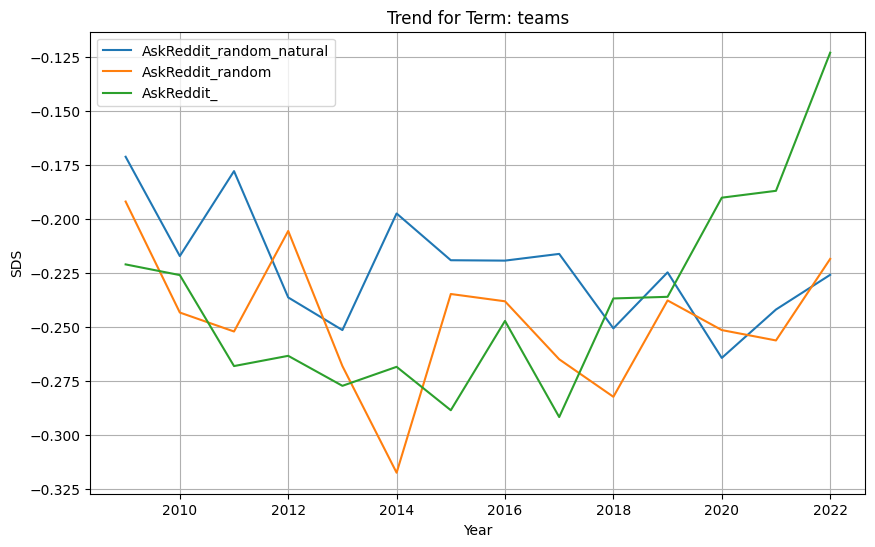

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term slack:
  Spearman Correlation: 0.6, p-value: 0.023308410879999977
  Pearson Correlation: 0.6210607704496152, p-value: 0.017766493339833538
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term slack:
  Spearman Correlation: 0.27472527472527475, p-value: 0.34182974371948127
  Pearson Correlation: 0.29754026197808964, p-value: 0.301539458012625
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term slack:
  Spearman Correlation: 0.8285714285714285, p-value: 0.000250534270865576
  Pearson Correlation: 0.852446809864272, p-value: 0.00010758443195284837


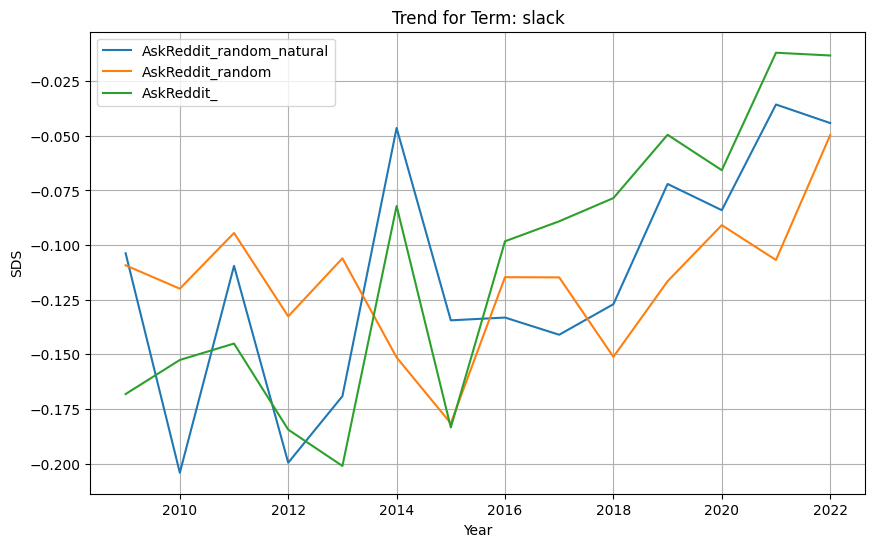

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term stripe:
  Spearman Correlation: 0.367032967032967, p-value: 0.1967388717074885
  Pearson Correlation: 0.6094639809997857, p-value: 0.020677353593037292
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term stripe:
  Spearman Correlation: 0.5252747252747253, p-value: 0.05374750176788299
  Pearson Correlation: 0.6586551473269687, p-value: 0.010421700715798909
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term stripe:
  Spearman Correlation: 0.6791208791208792, p-value: 0.007562257031145479
  Pearson Correlation: 0.7544172858746379, p-value: 0.001821654916150771


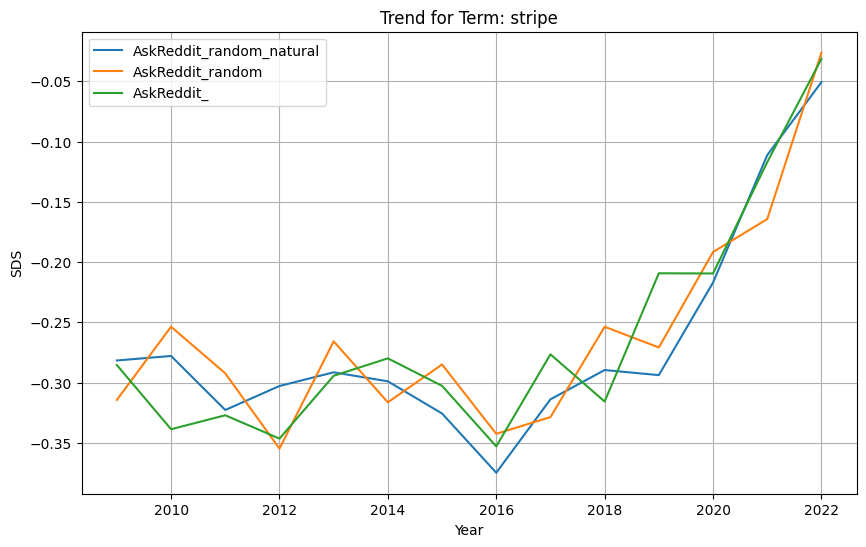

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term snap:
  Spearman Correlation: -0.5736263736263736, p-value: 0.03197081397639698
  Pearson Correlation: -0.5906700175507869, p-value: 0.026141071193105905
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term snap:
  Spearman Correlation: -0.7494505494505495, p-value: 0.0020301455491006457
  Pearson Correlation: -0.6009438476013671, p-value: 0.0230352787125441
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term snap:
  Spearman Correlation: 0.5208791208791209, p-value: 0.05615392734370261
  Pearson Correlation: 0.5212346993173491, p-value: 0.055956423466669236


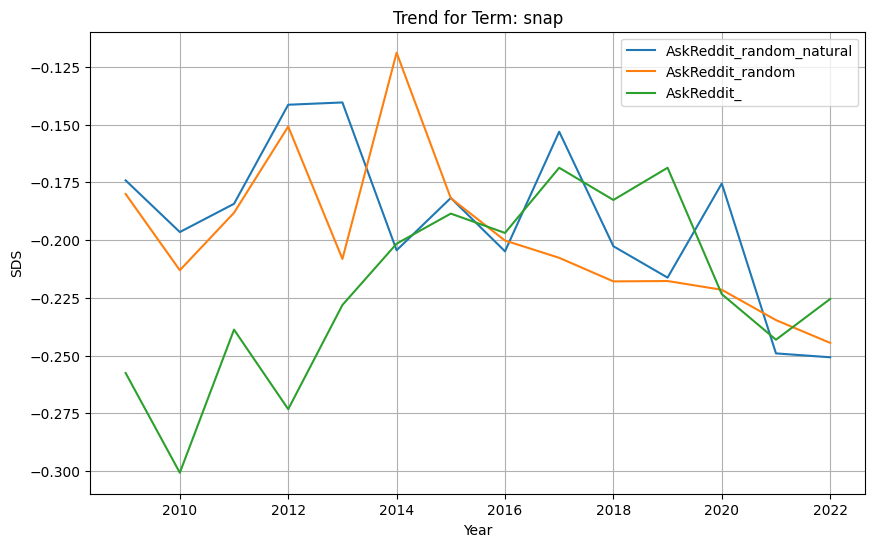

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term swift:
  Spearman Correlation: 0.389010989010989, p-value: 0.16921738979769044
  Pearson Correlation: 0.31969577993963355, p-value: 0.26518024792892325
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term swift:
  Spearman Correlation: 0.6131868131868132, p-value: 0.019706331926038816
  Pearson Correlation: 0.6935004096167406, p-value: 0.0059484273942692015
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term swift:
  Spearman Correlation: 0.7538461538461538, p-value: 0.001844725289257219
  Pearson Correlation: 0.8206475938309781, p-value: 0.0003226244649128233


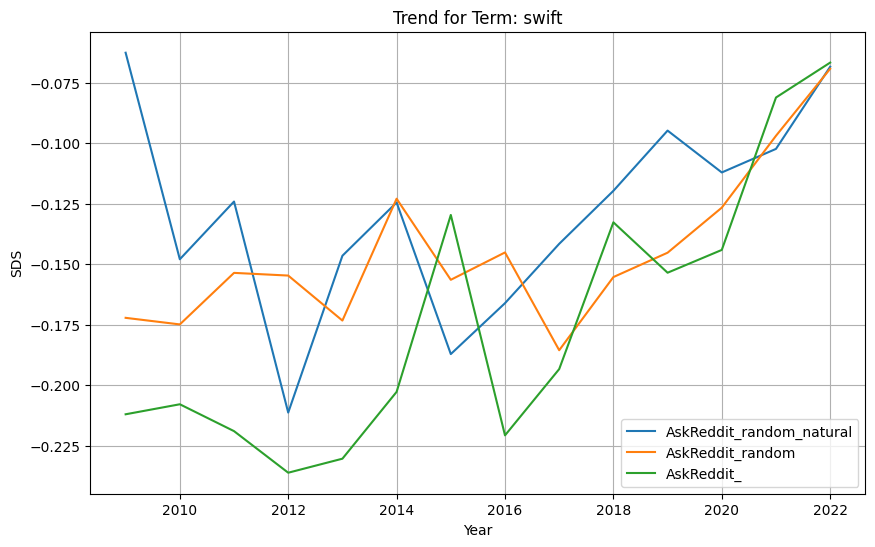

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term bumble:
  Spearman Correlation: 0.01978021978021978, p-value: 0.9464892274080114
  Pearson Correlation: -0.05054683100638527, p-value: 0.8637490372319796
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term bumble:
  Spearman Correlation: -0.059340659340659345, p-value: 0.8403017626906826
  Pearson Correlation: -0.18600694268766527, p-value: 0.5243327933509635
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term bumble:
  Spearman Correlation: 0.8197802197802198, p-value: 0.00033143695693539925
  Pearson Correlation: 0.9017049888278973, p-value: 1.0505051936773411e-05


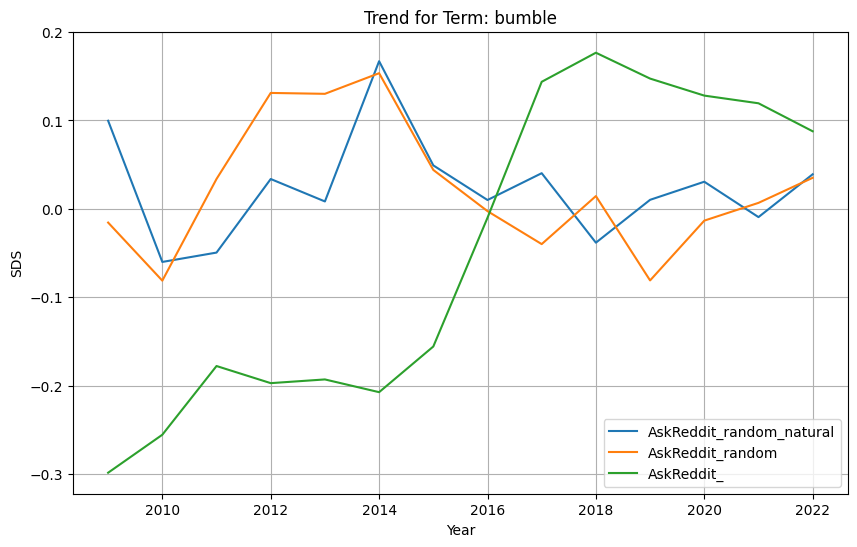

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term medium:
  Spearman Correlation: -0.389010989010989, p-value: 0.16921738979769044
  Pearson Correlation: -0.39476049312029393, p-value: 0.16245545915734463
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term medium:
  Spearman Correlation: -0.5516483516483517, p-value: 0.040849058351122895
  Pearson Correlation: -0.5040070504593495, p-value: 0.06611514825095485
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term medium:
  Spearman Correlation: -0.4241758241758242, p-value: 0.13063731043811047
  Pearson Correlation: -0.4846456853716191, p-value: 0.07903181636262514


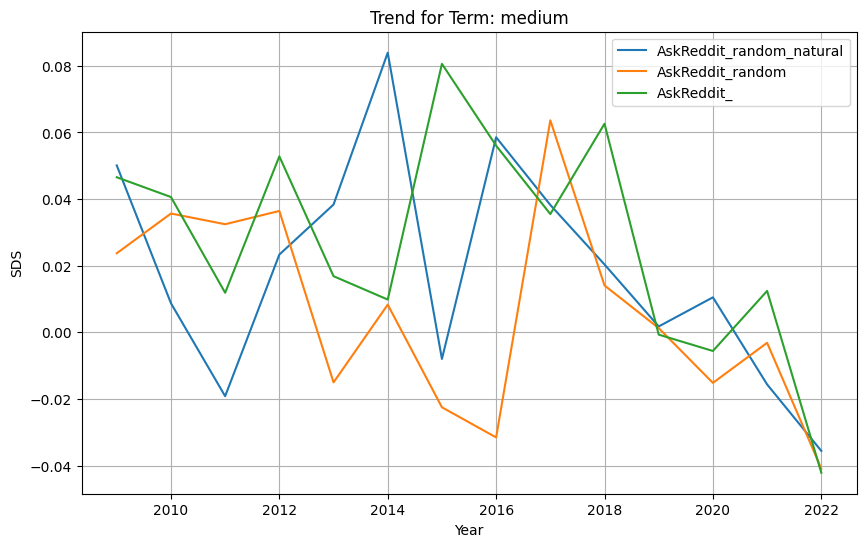

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term hinge:
  Spearman Correlation: 0.6923076923076923, p-value: 0.006071048749990052
  Pearson Correlation: 0.6700316712869191, p-value: 0.008745151026721368
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term hinge:
  Spearman Correlation: 0.6967032967032967, p-value: 0.005628677002967549
  Pearson Correlation: 0.7188809803449683, p-value: 0.0037653201717100953
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term hinge:
  Spearman Correlation: 0.4813186813186813, p-value: 0.08141829504280494
  Pearson Correlation: 0.5599383047721623, p-value: 0.03731090541736499


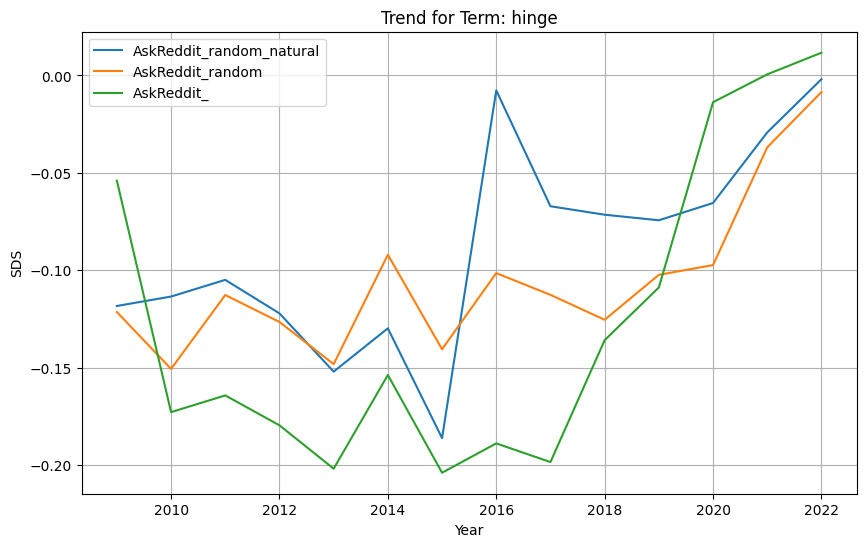

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term notion:
  Spearman Correlation: 0.05054945054945055, p-value: 0.8637420361792153
  Pearson Correlation: 0.10115666864470986, p-value: 0.7307789027508116
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term notion:
  Spearman Correlation: -0.4065934065934066, p-value: 0.14910193900151342
  Pearson Correlation: -0.036455397223897665, p-value: 0.9015323408177836
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term notion:
  Spearman Correlation: 0.410989010989011, p-value: 0.14433266812460507
  Pearson Correlation: 0.486599534697291, p-value: 0.07765353615164046


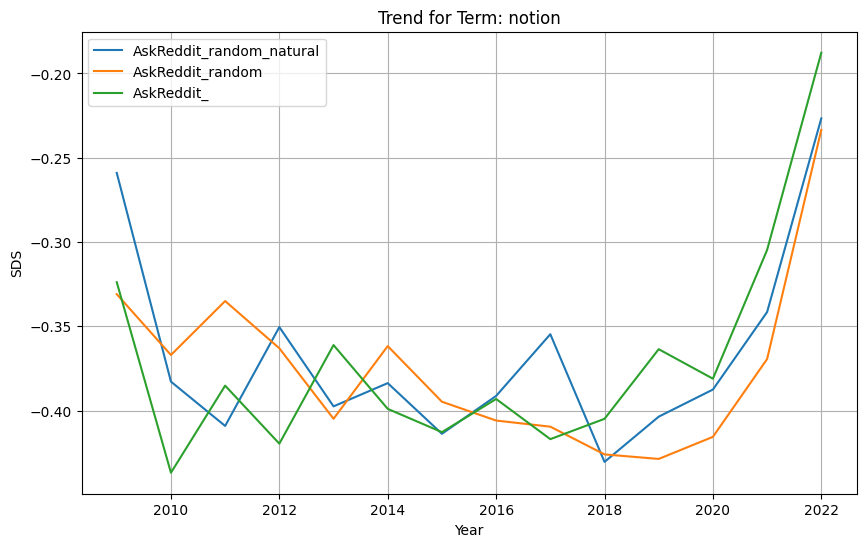

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term signal:
  Spearman Correlation: 0.8813186813186813, p-value: 3.109511008397839e-05
  Pearson Correlation: 0.8525388357594982, p-value: 0.00010720489692419927
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term signal:
  Spearman Correlation: -0.05054945054945055, p-value: 0.8637420361792153
  Pearson Correlation: -0.015715215189400347, p-value: 0.9574759268734011
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term signal:
  Spearman Correlation: 0.2879120879120879, p-value: 0.3181928710258003
  Pearson Correlation: 0.30849588882148815, p-value: 0.28321691682598626


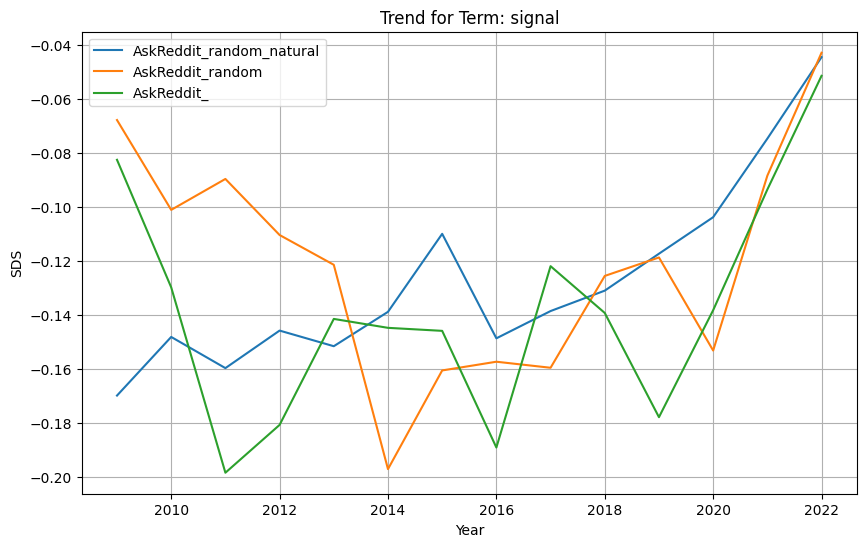

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term azure:
  Spearman Correlation: -0.032967032967032975, p-value: 0.910918653071845
  Pearson Correlation: -0.06421360035860406, p-value: 0.8273604851416313
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term azure:
  Spearman Correlation: 0.2571428571428571, p-value: 0.3748119038799703
  Pearson Correlation: 0.29143790958170673, p-value: 0.31203486848653056
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term azure:
  Spearman Correlation: 0.8857142857142857, p-value: 2.5040044989174743e-05
  Pearson Correlation: 0.8771898841029032, p-value: 3.782425762779154e-05


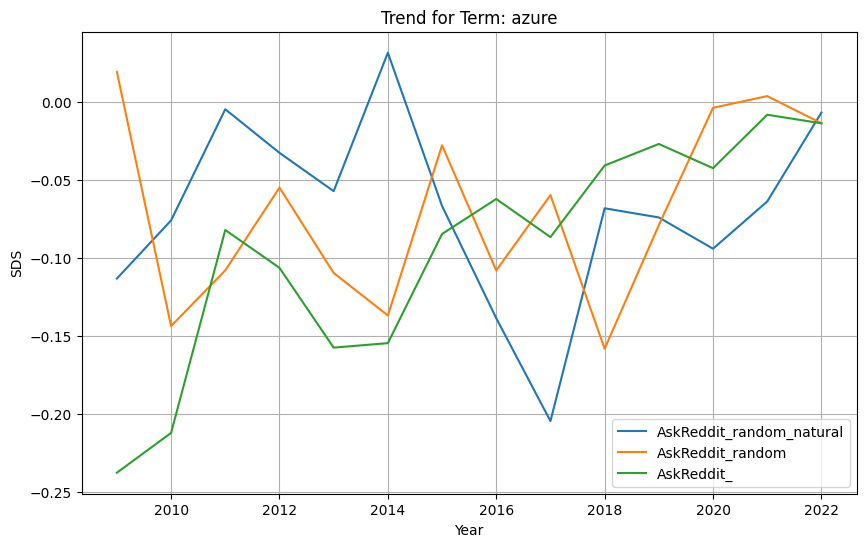

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term echo:
  Spearman Correlation: -0.221978021978022, p-value: 0.44562965795360865
  Pearson Correlation: -0.31984721345935097, p-value: 0.264941201016501
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term echo:
  Spearman Correlation: -0.42857142857142855, p-value: 0.1262738881593127
  Pearson Correlation: -0.4840643050096642, p-value: 0.07944524133851025
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term echo:
  Spearman Correlation: 0.45494505494505494, p-value: 0.10215352669182914
  Pearson Correlation: 0.49044060296275555, p-value: 0.07499362552839002


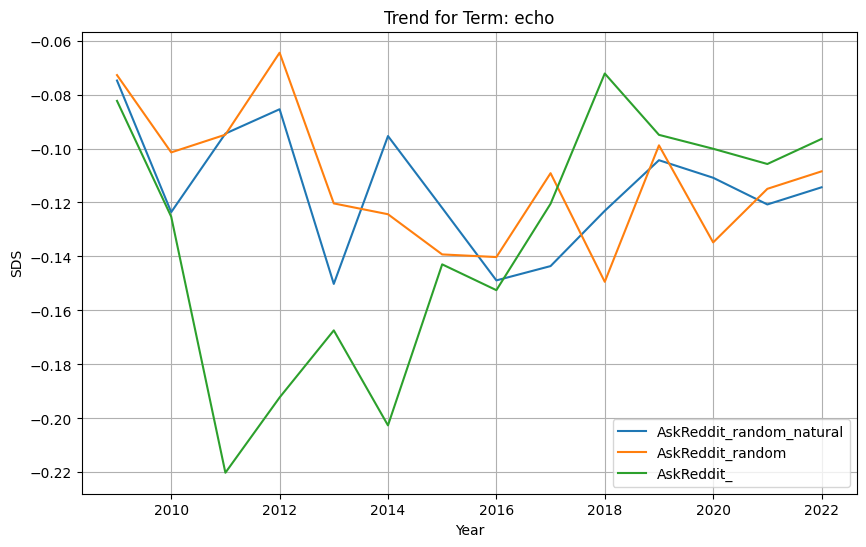

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term alexa:
  Spearman Correlation: 0.432967032967033, p-value: 0.12201000596848025
  Pearson Correlation: 0.5017639050323615, p-value: 0.0675285462529755
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term alexa:
  Spearman Correlation: -0.3318681318681319, p-value: 0.24637718314961166
  Pearson Correlation: -0.4145806515953037, p-value: 0.14051186732164173
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term alexa:
  Spearman Correlation: 0.38461538461538464, p-value: 0.17450875077509556
  Pearson Correlation: 0.4262939515157458, p-value: 0.1285222133246681


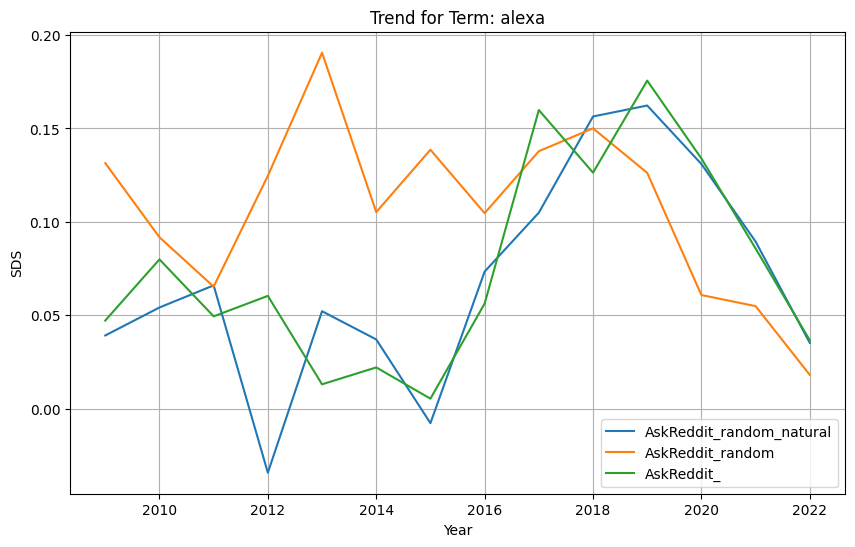

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term prime:
  Spearman Correlation: 0.5780219780219781, p-value: 0.030383014145236965
  Pearson Correlation: 0.559713442153978, p-value: 0.03740378360294546
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term prime:
  Spearman Correlation: 0.5120879120879122, p-value: 0.06119848615645835
  Pearson Correlation: 0.5304093161037479, p-value: 0.05103205152227056
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term prime:
  Spearman Correlation: 0.8637362637362638, p-value: 6.846377605646043e-05
  Pearson Correlation: 0.8425355645280995, p-value: 0.0001553626544428435


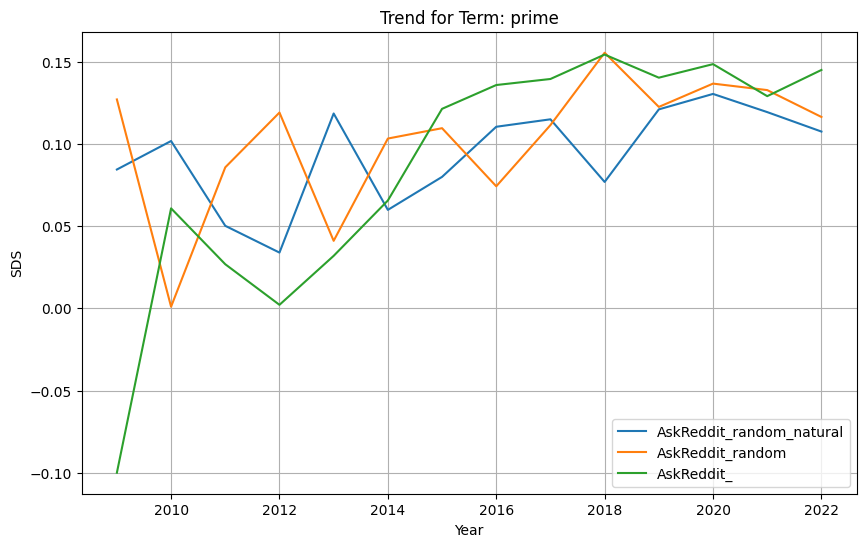

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term edge:
  Spearman Correlation: -0.7846153846153847, p-value: 0.0008900739749078555
  Pearson Correlation: -0.7285818482816018, p-value: 0.0031217614676908503
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term edge:
  Spearman Correlation: -0.6967032967032967, p-value: 0.005628677002967549
  Pearson Correlation: -0.694081447602088, p-value: 0.005889395349514382
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term edge:
  Spearman Correlation: -0.49890109890109896, p-value: 0.06936352739715487
  Pearson Correlation: -0.508122928339309, p-value: 0.06357692045948646


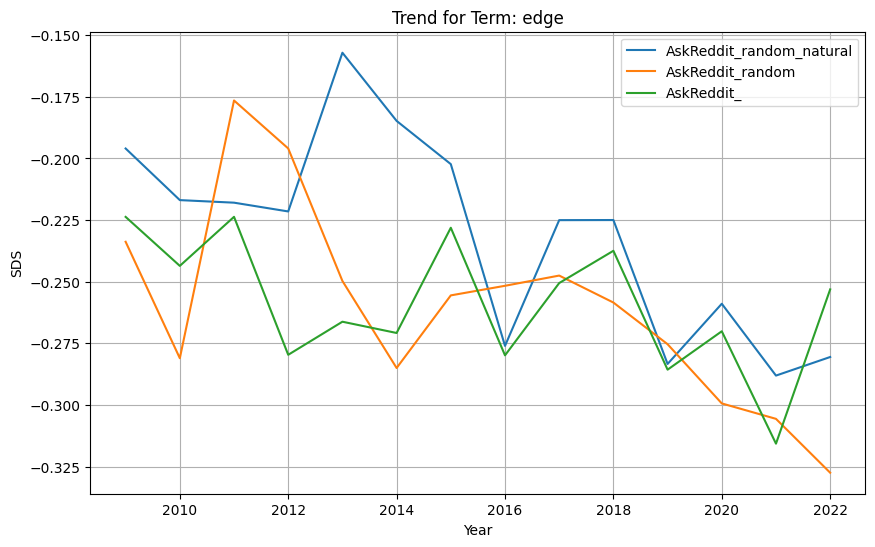

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term meta:
  Spearman Correlation: 0.4813186813186813, p-value: 0.08141829504280494
  Pearson Correlation: 0.5092692190345576, p-value: 0.06288261818746194
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term meta:
  Spearman Correlation: 0.37142857142857144, p-value: 0.1910208120436164
  Pearson Correlation: 0.36791017314502267, p-value: 0.19558916586025948
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term meta:
  Spearman Correlation: 0.7934065934065934, p-value: 0.0007075341356182061
  Pearson Correlation: 0.7885270423171179, p-value: 0.0008047034923157654


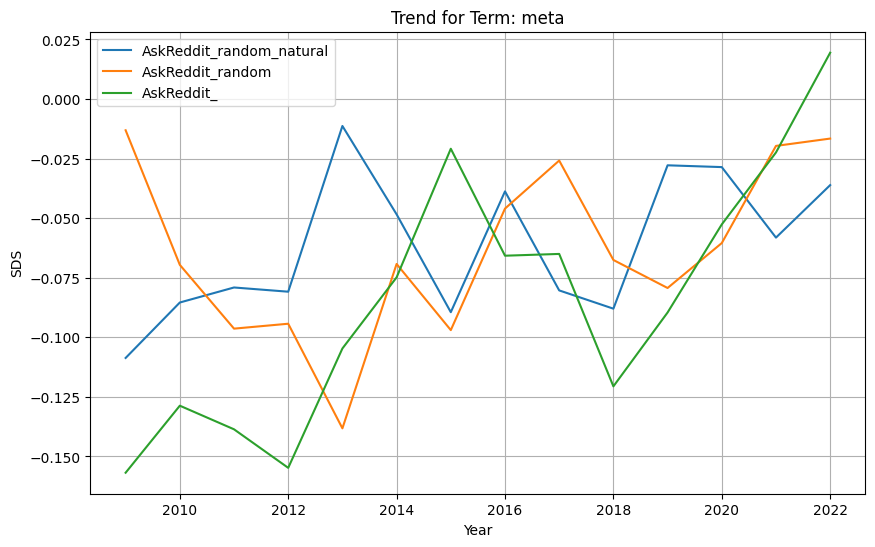

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term lightning:
  Spearman Correlation: 0.0857142857142857, p-value: 0.7707850311186757
  Pearson Correlation: 0.010121725096335799, p-value: 0.9726048517743933
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term lightning:
  Spearman Correlation: -0.1956043956043956, p-value: 0.5027500912969567
  Pearson Correlation: -0.1265584980229764, p-value: 0.6663740843305074
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term lightning:
  Spearman Correlation: 0.5296703296703297, p-value: 0.05141659813787076
  Pearson Correlation: 0.5235804907311545, p-value: 0.05466601509344178


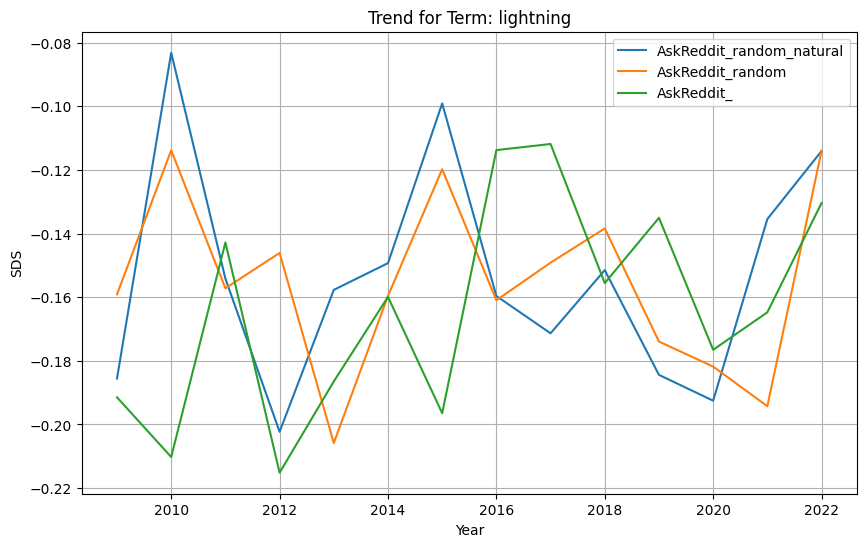

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term eats:
  Spearman Correlation: -0.1032967032967033, p-value: 0.725282211088945
  Pearson Correlation: 0.14772557819251658, p-value: 0.6142720840949067
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term eats:
  Spearman Correlation: -0.665934065934066, p-value: 0.00932299909684176
  Pearson Correlation: -0.7085143530776823, p-value: 0.004563711238118494
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term eats:
  Spearman Correlation: 0.389010989010989, p-value: 0.16921738979769044
  Pearson Correlation: 0.3116070161172357, p-value: 0.278136070612967


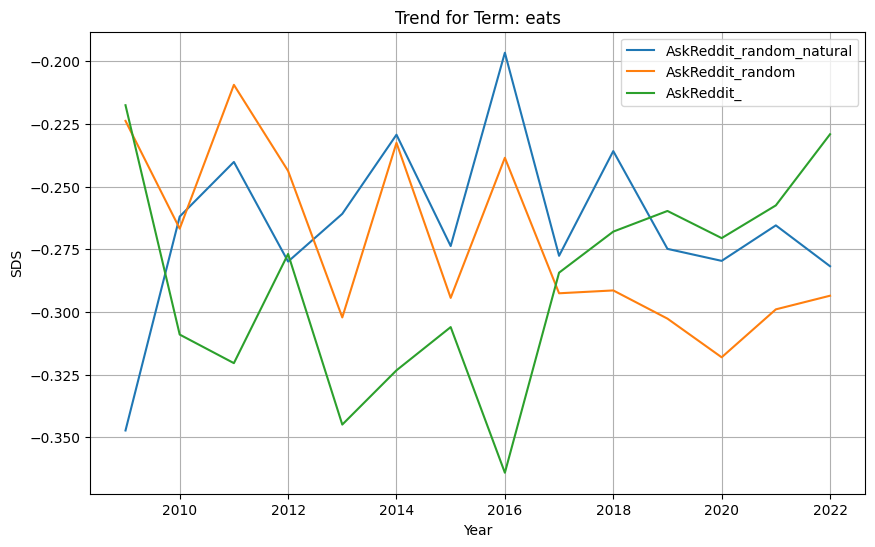

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term spark:
  Spearman Correlation: 0.1252747252747253, p-value: 0.6695823965448444
  Pearson Correlation: 0.28706495719659003, p-value: 0.3196826430415549
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term spark:
  Spearman Correlation: 0.27912087912087913, p-value: 0.33384507719455425
  Pearson Correlation: 0.479414345279953, p-value: 0.08280687203517523
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term spark:
  Spearman Correlation: 0.2879120879120879, p-value: 0.3181928710258003
  Pearson Correlation: 0.5088674939806054, p-value: 0.06312531940220456


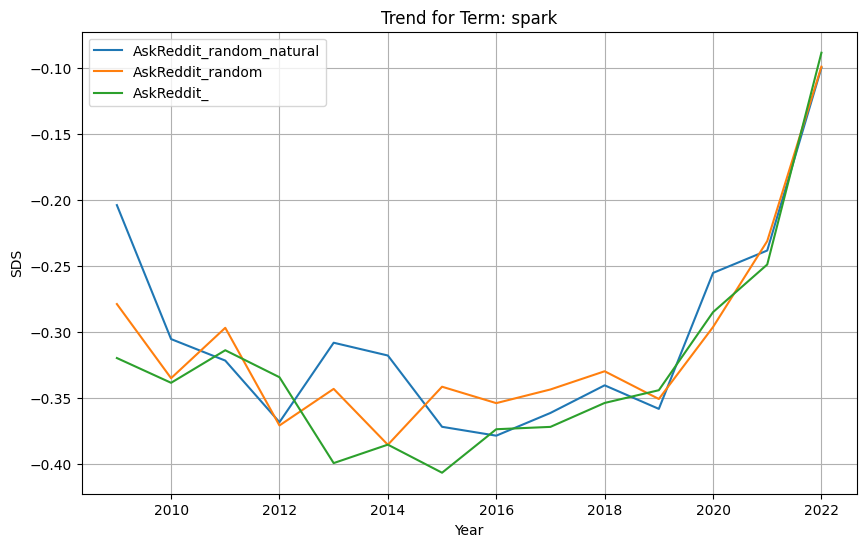

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, term corona:
  Spearman Correlation: -0.5208791208791209, p-value: 0.05615392734370261
  Pearson Correlation: -0.5189461424410227, p-value: 0.05723639920718876
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, term corona:
  Spearman Correlation: -0.3186813186813187, p-value: 0.2667849608113615
  Pearson Correlation: -0.4740056583982369, p-value: 0.08684130614918308
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term corona:
  Spearman Correlation: 0.745054945054945, p-value: 0.0022300373167420734
  Pearson Correlation: 0.6913700679459955, p-value: 0.006168819357289746


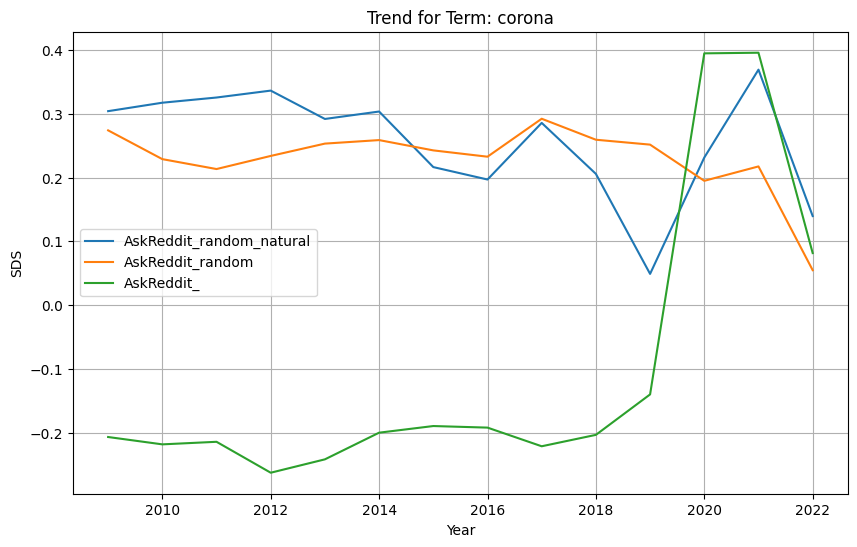

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model, Dataset-wide:
  Spearman Correlation: 0.45494505494505494, p-value: 0.10215352669182914
  Pearson Correlation: 0.5157440725598021, p-value: 0.059062540412320196
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model, Dataset-wide:
  Spearman Correlation: 0.1076923076923077, p-value: 0.7140308087262492
  Pearson Correlation: 0.03475223536597419, p-value: 0.9061136995360267
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, Dataset-wide:
  Spearman Correlation: 0.9648351648351648, p-value: 2.5304057544450237e-08
  Pearson Correlation: 0.9752124104532061, p-value: 3.174802561202929e-09


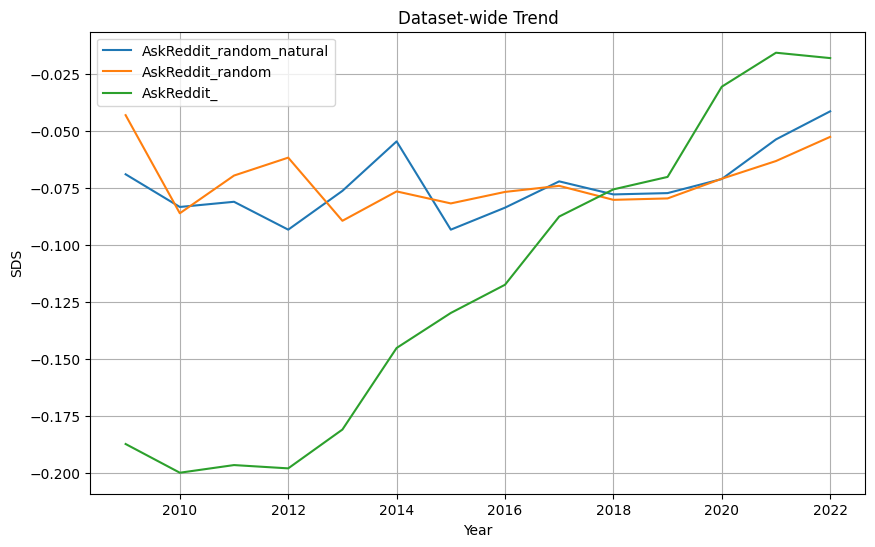

In [16]:

import gensim
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr, pearsonr
from collections import defaultdict

plt.style.use("default")

# Function to compute average vector
def compute_average_vector(words, model):
    vector_sum = 0
    count = 0
    for word in words:
        if word in model.wv.key_to_index:
            vector_sum += model.wv[word]
            count += 1
    return vector_sum / count if count != 0 else None

# Define years range
years = range(2009, 2023)

# Define your model paths
# model_paths = [
#     '/path/to/model1.model',
#     '/path/to/model2.model',
#     '/path/to/model3.model'
# ]

# Lists to collect dataset-wide similarities for each model
dataset_similarities_by_model = {path: defaultdict(list) for path in model_paths}

# Iterate through all terms
for index, row in known_shifts_df.iterrows():
    term = row['Term']
    before_words = row['Meaning Before'].split(', ')
    after_words = row['Meaning After'].split(', ')

    plt.figure(figsize=(10, 6))
    
    for model_path in model_paths:
        # Load the model
        model = gensim.models.Word2Vec.load(model_path)

        # Compute before and after vectors
        before_vector = compute_average_vector(before_words, model)
        after_vector = compute_average_vector(after_words, model)
        if before_vector is None or after_vector is None:
            continue  # Skip to next iteration if either vector is None

        # Compute projection vector
        projection_vector = after_vector - before_vector

        # Collect term-specific similarity scores
        term_similarities_by_year = []
        
        for year in years:
            term_year = f'{term}_{year}'
            if term_year in model.wv.key_to_index:
                term_vector = model.wv[term_year]
                similarity = 1 - cosine(projection_vector, term_vector)
                term_similarities_by_year.append(similarity)
                dataset_similarities_by_model[model_path][year].append(similarity)
        
        # Compute and print Spearman and Pearson correlations
        spearman_corr, spearman_p_value = spearmanr(term_similarities_by_year, years)
        pearson_corr, pearson_p_value = pearsonr(term_similarities_by_year, years)
        
        print(f"For model at {model_path}, term {term}:")
        print(f"  Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")
        print(f"  Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")

        
        # Plot
        plt.plot(years, term_similarities_by_year, label=f"AskReddit_{model_path.split('/')[-1][:-41]}")
    
    plt.xlabel('Year')
    plt.ylabel('SDS')
    plt.title(f'Trend for Term: {term}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Dataset-wide analysis
plt.figure(figsize=(10, 6))

for model_path in model_paths:
    dataset_similarities = []
    
    for year in years:
        year_mean = np.mean(dataset_similarities_by_model[model_path][year])
        dataset_similarities.append(year_mean)
        
    # Compute and print dataset-wide Spearman and Pearson correlations
    spearman_corr, spearman_p_value = spearmanr(dataset_similarities, years)
    pearson_corr, pearson_p_value = pearsonr(dataset_similarities, years)
    
    print(f"For model at {model_path}, Dataset-wide:")
    print(f"  Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")
    print(f"  Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")

    
    # Plot dataset-wide similarities
    plt.plot(years, dataset_similarities, label=f"AskReddit_{model_path.split('/')[-1][:-41]}")

plt.xlabel('Year')
plt.ylabel('SDS')
plt.title('Dataset-wide Trend')
plt.legend()
plt.grid(True)
plt.show()


## original model different sample sizes

In [5]:
# List of model paths
model_paths = [
    '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model',
    '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model',
    '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model',
    '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model',
    '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_5_percent.model',
    '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_1_percent.model'
]

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term tinder:
  Spearman Correlation: 0.7802197802197802, p-value: 0.0009944938002309496
  Pearson Correlation: 0.8499926490750259, p-value: 0.00011811597896176452
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term tinder:
  Spearman Correlation: 0.9604395604395607, p-value: 5.081053892329076e-08
  Pearson Correlation: 0.8903518282137789, p-value: 1.9733535281061293e-05
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term tinder:
  Spearman Correlation: 0.7934065934065934, p-value: 0.0007075341356182061
  Pearson Correlation: 0.8721736164582494, p-value: 4.755326759074951e-05
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term tinder:
  Spearman Correlation: 0.7934065934065934, p-

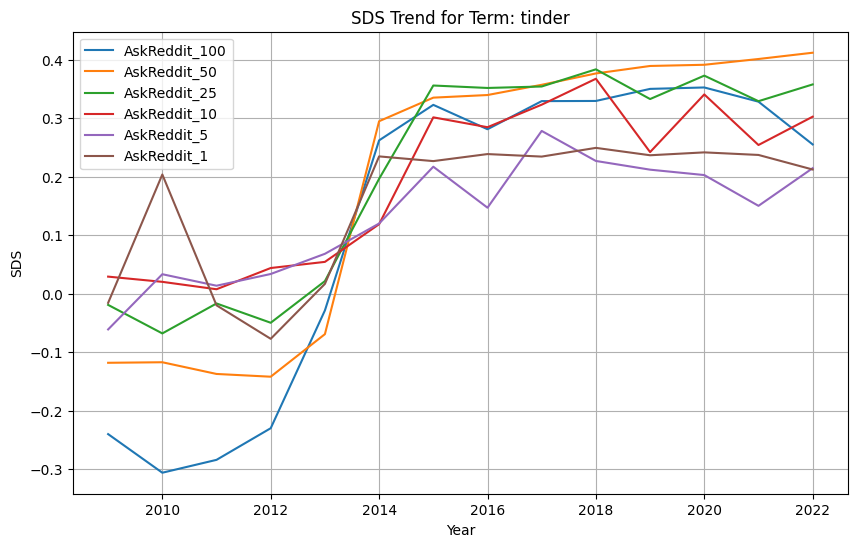

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term zoom:
  Spearman Correlation: 0.7010989010989012, p-value: 0.005211861769946939
  Pearson Correlation: 0.715829563320726, p-value: 0.003987920595763552
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term zoom:
  Spearman Correlation: 0.07252747252747253, p-value: 0.8053763135410923
  Pearson Correlation: 0.4997105061079102, p-value: 0.06884116188158025
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term zoom:
  Spearman Correlation: 0.3538461538461538, p-value: 0.21453987088124626
  Pearson Correlation: 0.5827131871067125, p-value: 0.028753972560752832
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term zoom:
  Spearman Correlation: 0.37142857142857144, p-value: 0.1910208120

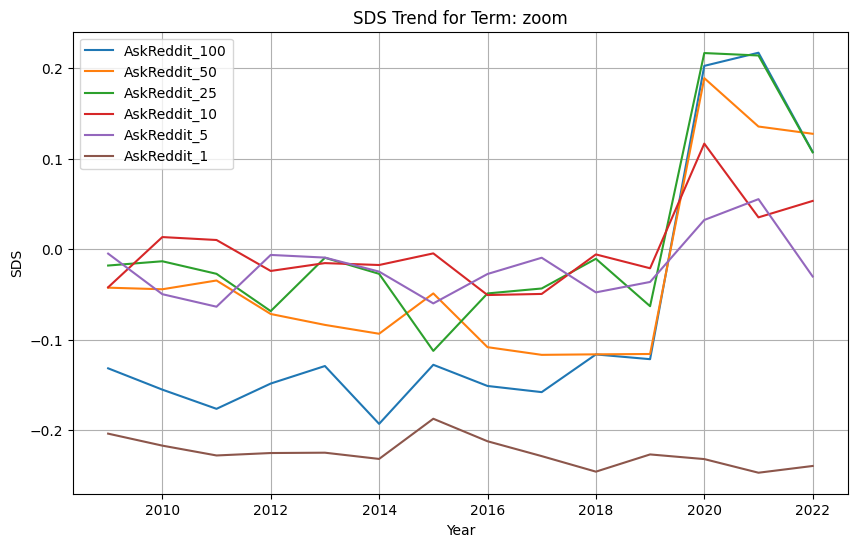

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term telegram:
  Spearman Correlation: 0.621978021978022, p-value: 0.017550315290540047
  Pearson Correlation: 0.6011008300627241, p-value: 0.02299008538837029
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term telegram:
  Spearman Correlation: 0.7098901098901099, p-value: 0.004450741418764225
  Pearson Correlation: 0.722734753700774, p-value: 0.0034982655884491995
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term telegram:
  Spearman Correlation: 0.6263736263736264, p-value: 0.016541935428871186
  Pearson Correlation: 0.6129547244233035, p-value: 0.01976583950094728
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term telegram:
  Spearman Correlation: -0.17362637362637365, p-v

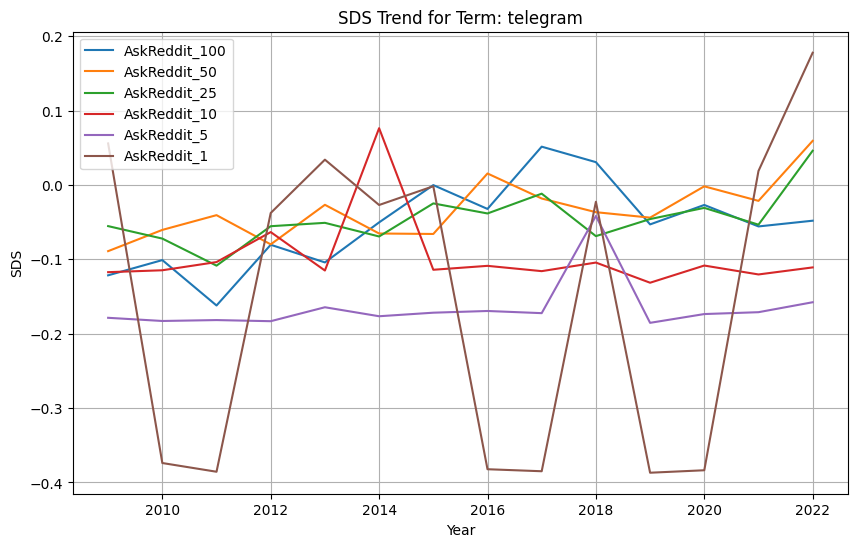

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term twitch:
  Spearman Correlation: 0.9604395604395607, p-value: 5.081053892329076e-08
  Pearson Correlation: 0.923454324024916, p-value: 2.4586135566018954e-06
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term twitch:
  Spearman Correlation: 0.9692307692307693, p-value: 1.1465229425475097e-08
  Pearson Correlation: 0.9064049556636335, p-value: 7.911717559287584e-06
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term twitch:
  Spearman Correlation: 0.9076923076923077, p-value: 7.3017039968523426e-06
  Pearson Correlation: 0.8984924338997554, p-value: 1.2649947175106687e-05
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term twitch:
  Spearman Correlation: 0.7802197802197802, p

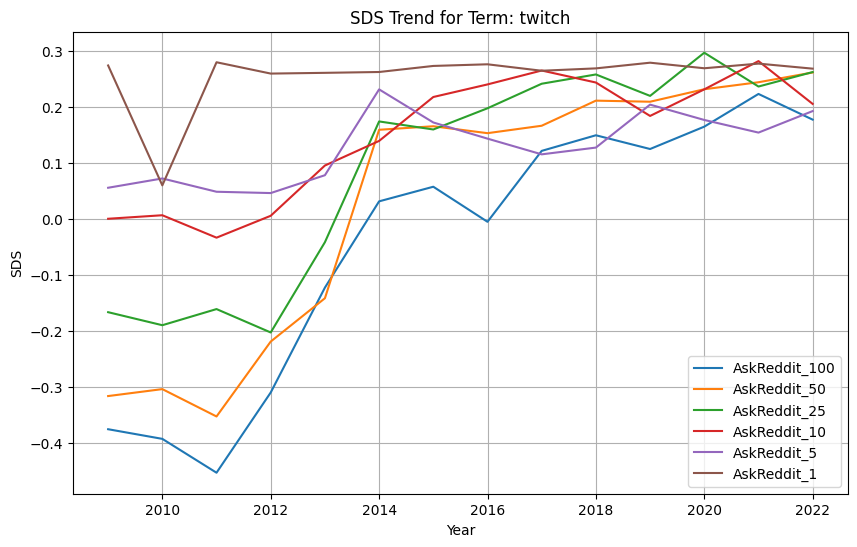

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term discord:
  Spearman Correlation: 0.8989010989010989, p-value: 1.2358700865600781e-05
  Pearson Correlation: 0.9105691230249323, p-value: 6.0771176364019305e-06
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term discord:
  Spearman Correlation: 0.9032967032967033, p-value: 9.558659401055547e-06
  Pearson Correlation: 0.9219743915766658, p-value: 2.748964123936821e-06
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term discord:
  Spearman Correlation: 0.8769230769230769, p-value: 3.829698105449934e-05
  Pearson Correlation: 0.9195818114396418, p-value: 3.277736193142063e-06
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term discord:
  Spearman Correlation: 0.8857142857142857

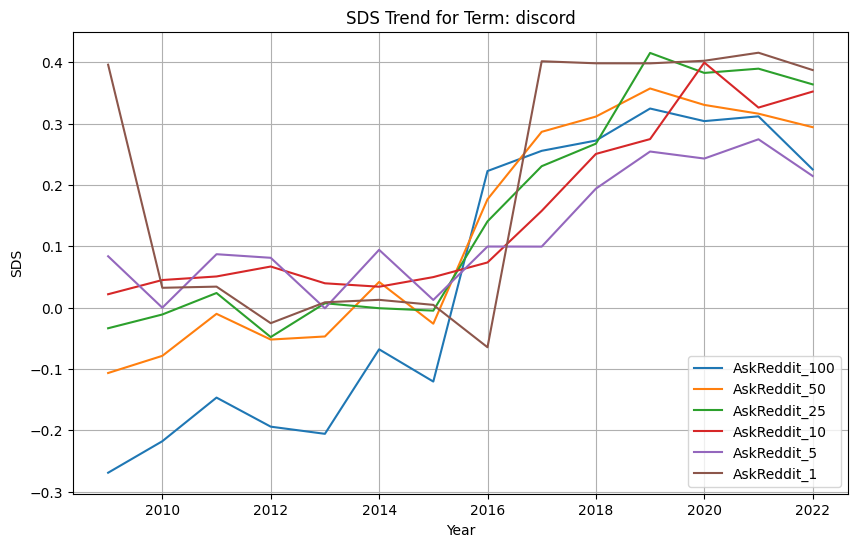

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term teams:
  Spearman Correlation: 0.389010989010989, p-value: 0.16921738979769044
  Pearson Correlation: 0.547881226984951, p-value: 0.04253576113657478
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term teams:
  Spearman Correlation: 0.6087912087912088, p-value: 0.02085661601722322
  Pearson Correlation: 0.6662443158439474, p-value: 0.009278243358562838
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term teams:
  Spearman Correlation: 0.5604395604395604, p-value: 0.03710447700407433
  Pearson Correlation: 0.5647787899912657, p-value: 0.03535253561814646
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term teams:
  Spearman Correlation: 0.6923076923076923, p-value: 0.0060710487

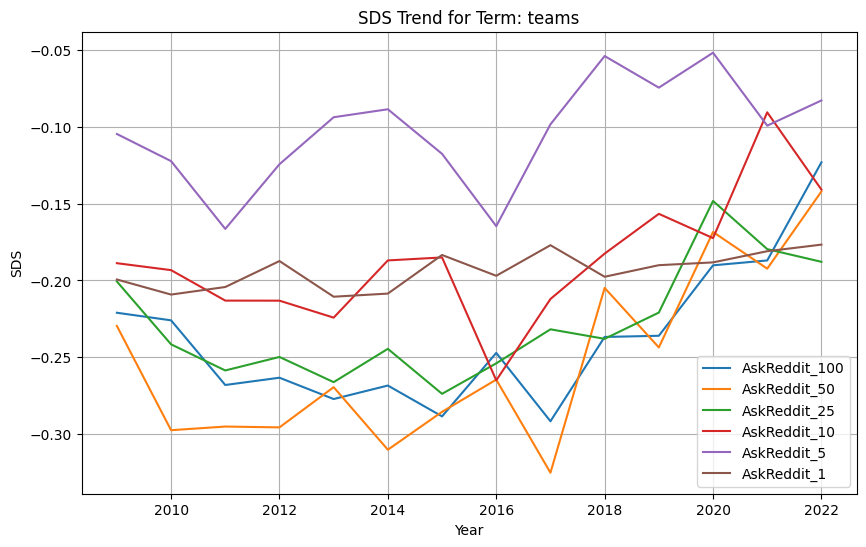

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term slack:
  Spearman Correlation: 0.8285714285714285, p-value: 0.000250534270865576
  Pearson Correlation: 0.852446809864272, p-value: 0.00010758443195284837
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term slack:
  Spearman Correlation: 0.7538461538461538, p-value: 0.001844725289257219
  Pearson Correlation: 0.8300106408990329, p-value: 0.00023896426004498043
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term slack:
  Spearman Correlation: 0.7890109890109891, p-value: 0.0007946144116544928
  Pearson Correlation: 0.736774369182919, p-value: 0.0026487303228650816
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term slack:
  Spearman Correlation: 0.6263736263736264, p-value: 0

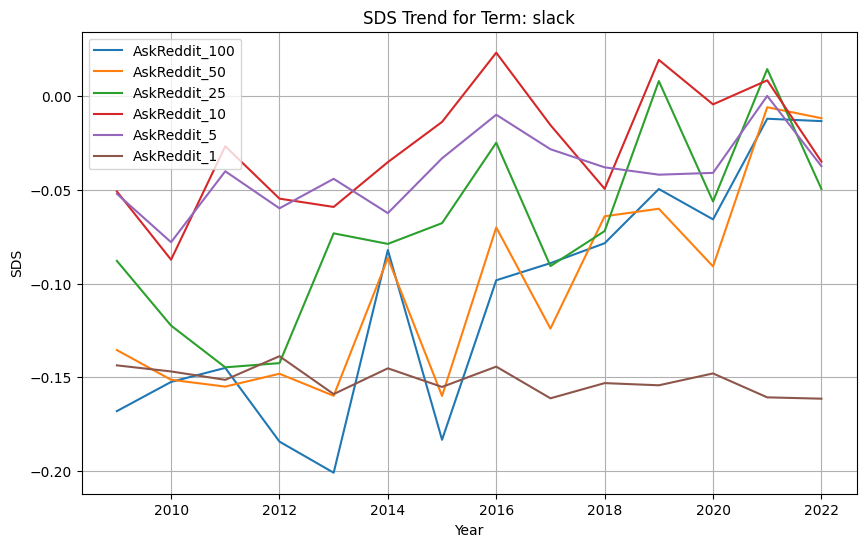

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term stripe:
  Spearman Correlation: 0.6791208791208792, p-value: 0.007562257031145479
  Pearson Correlation: 0.7544172858746379, p-value: 0.001821654916150771
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term stripe:
  Spearman Correlation: 0.5032967032967033, p-value: 0.06656042759911303
  Pearson Correlation: 0.5347206042311153, p-value: 0.048830082137360925
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term stripe:
  Spearman Correlation: 0.5956043956043956, p-value: 0.024612610795286847
  Pearson Correlation: 0.6317649700130916, p-value: 0.01536598536333812
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term stripe:
  Spearman Correlation: 0.3186813186813187, p-value: 0.2

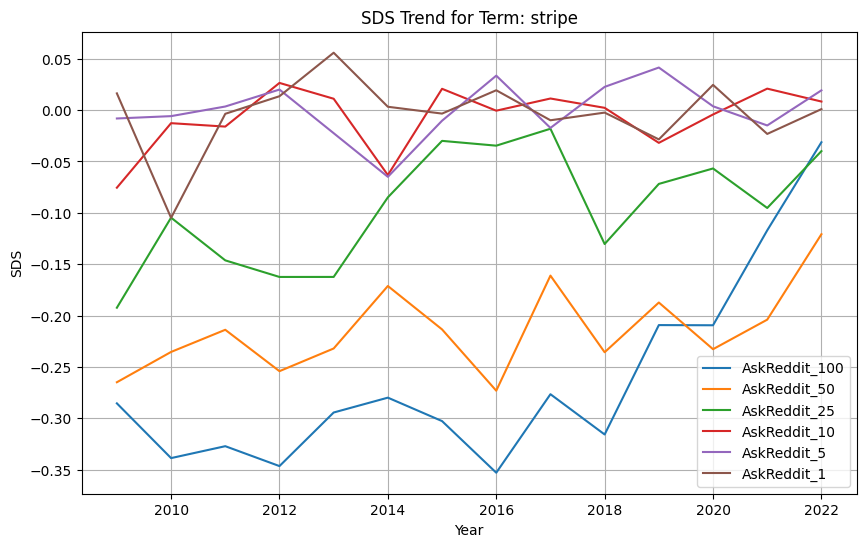

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term snap:
  Spearman Correlation: 0.5208791208791209, p-value: 0.05615392734370261
  Pearson Correlation: 0.5212346993173491, p-value: 0.055956423466669236
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term snap:
  Spearman Correlation: 0.8857142857142857, p-value: 2.5040044989174743e-05
  Pearson Correlation: 0.874181803955374, p-value: 4.3439439111208124e-05
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term snap:
  Spearman Correlation: 0.5120879120879122, p-value: 0.06119848615645835
  Pearson Correlation: 0.421703619028909, p-value: 0.13313545286583658
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term snap:
  Spearman Correlation: 0.1032967032967033, p-value: 0.72528221

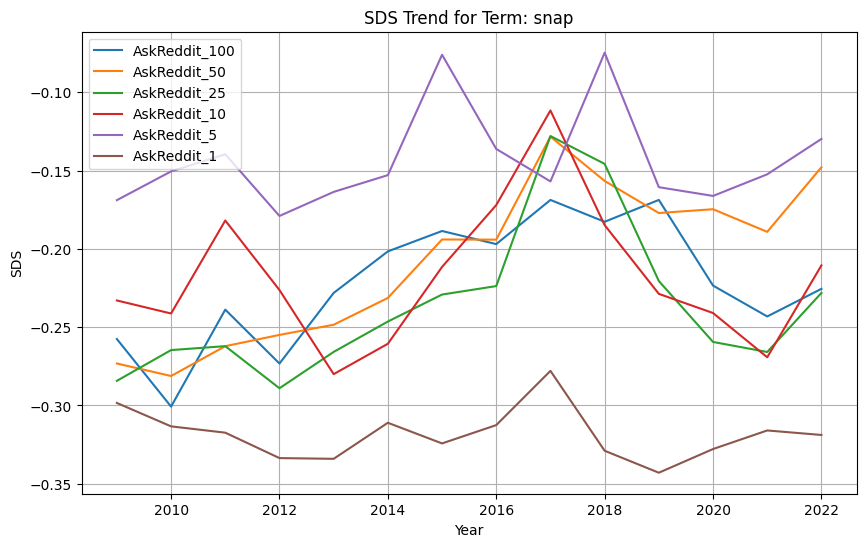

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term swift:
  Spearman Correlation: 0.7538461538461538, p-value: 0.001844725289257219
  Pearson Correlation: 0.8206475938309781, p-value: 0.0003226244649128233
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term swift:
  Spearman Correlation: 0.7010989010989012, p-value: 0.005211861769946939
  Pearson Correlation: 0.6727968009977027, p-value: 0.008371137763621628
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term swift:
  Spearman Correlation: 0.6351648351648352, p-value: 0.01465788132728914
  Pearson Correlation: 0.6442945591820345, p-value: 0.012879313197336045
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term swift:
  Spearman Correlation: 0.7054945054945055, p-value: 0.004

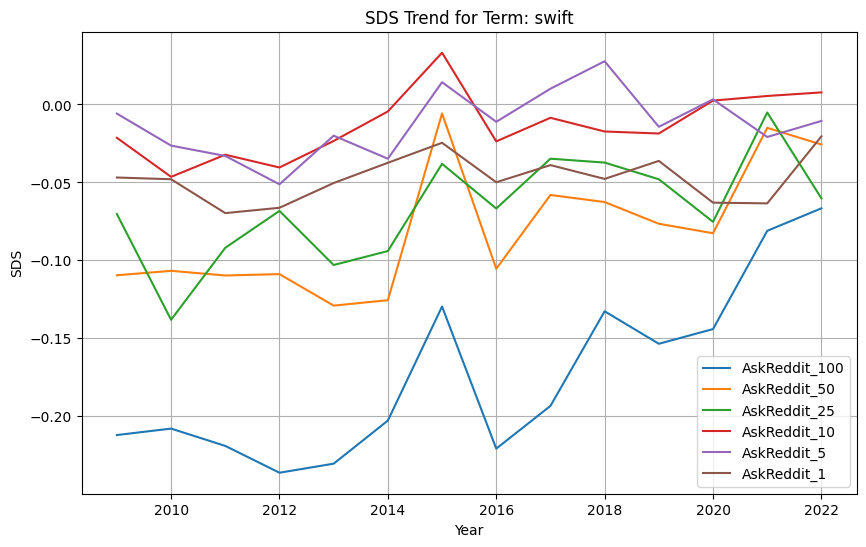

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term bumble:
  Spearman Correlation: 0.8197802197802198, p-value: 0.00033143695693539925
  Pearson Correlation: 0.9017049888278973, p-value: 1.0505051936773411e-05
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term bumble:
  Spearman Correlation: 0.8945054945054945, p-value: 1.579830848680049e-05
  Pearson Correlation: 0.9148412189098718, p-value: 4.573677605697381e-06
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term bumble:
  Spearman Correlation: 0.8593406593406594, p-value: 8.200994666805756e-05
  Pearson Correlation: 0.851883723312855, p-value: 0.00010993057101953056
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term bumble:
  Spearman Correlation: 0.6967032967032967, p-

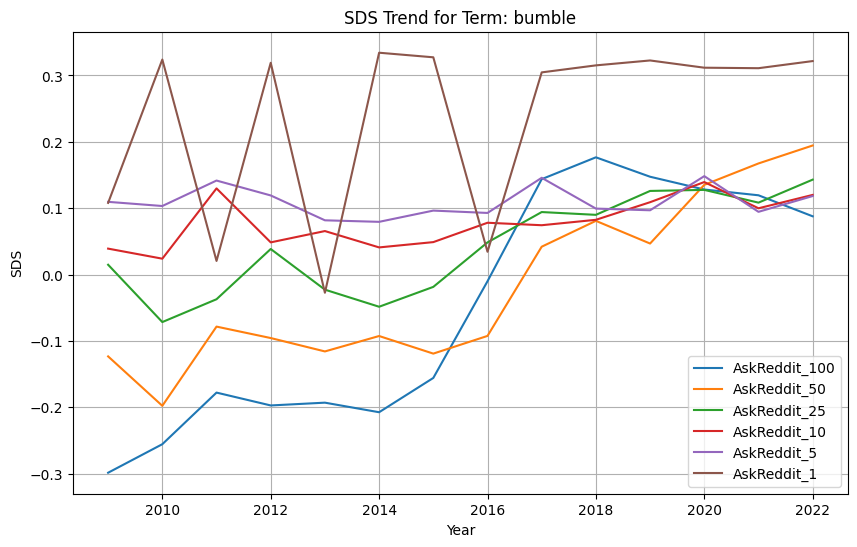

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term medium:
  Spearman Correlation: -0.4241758241758242, p-value: 0.13063731043811047
  Pearson Correlation: -0.4846456853716191, p-value: 0.07903181636262514
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term medium:
  Spearman Correlation: -0.27472527472527475, p-value: 0.34182974371948127
  Pearson Correlation: -0.3401255035578283, p-value: 0.23409676154939313
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term medium:
  Spearman Correlation: -0.3802197802197802, p-value: 0.17990614630608154
  Pearson Correlation: -0.40652377288501873, p-value: 0.14917832102703485
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term medium:
  Spearman Correlation: -0.3406593406593406, p-value

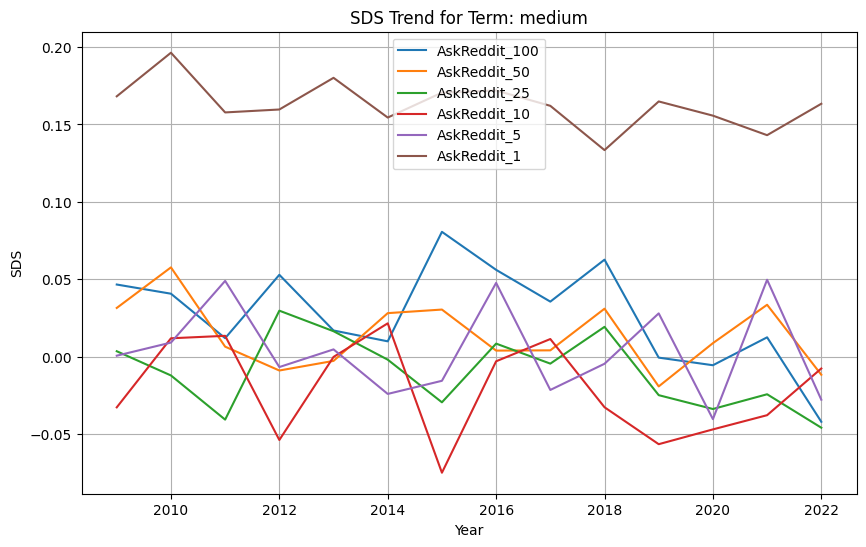

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term hinge:
  Spearman Correlation: 0.4813186813186813, p-value: 0.08141829504280494
  Pearson Correlation: 0.5599383047721623, p-value: 0.03731090541736499
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term hinge:
  Spearman Correlation: 0.1032967032967033, p-value: 0.725282211088945
  Pearson Correlation: 0.36342434584633226, p-value: 0.20151360077919803
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term hinge:
  Spearman Correlation: 0.2571428571428571, p-value: 0.3748119038799703
  Pearson Correlation: 0.2340689076197964, p-value: 0.42056916857084437
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term hinge:
  Spearman Correlation: 0.3054945054945055, p-value: 0.28816988587

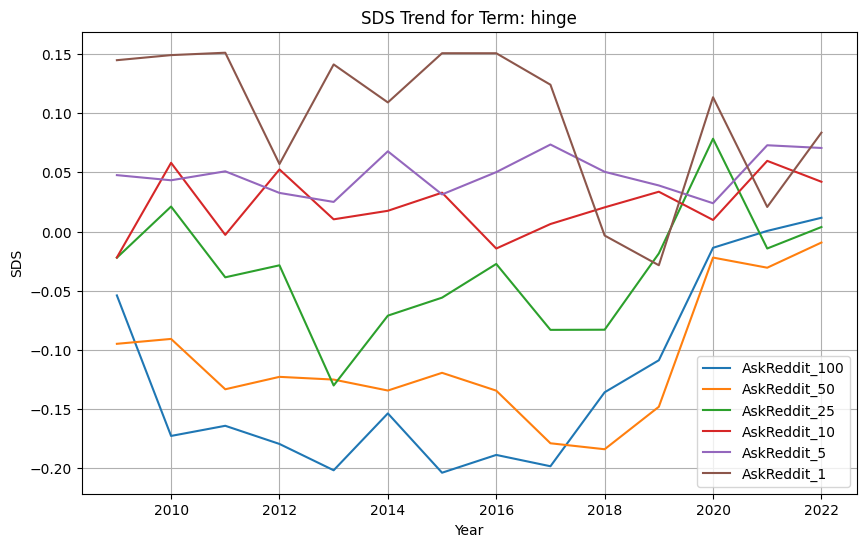

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term notion:
  Spearman Correlation: 0.410989010989011, p-value: 0.14433266812460507
  Pearson Correlation: 0.486599534697291, p-value: 0.07765353615164046
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term notion:
  Spearman Correlation: 0.8065934065934066, p-value: 0.0004911128961691055
  Pearson Correlation: 0.7954949496689364, p-value: 0.0006689363842030832
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term notion:
  Spearman Correlation: 0.7494505494505495, p-value: 0.0020301455491006457
  Pearson Correlation: 0.7814863610244649, p-value: 0.0009634516268232324
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term notion:
  Spearman Correlation: 0.6747252747252748, p-value: 0

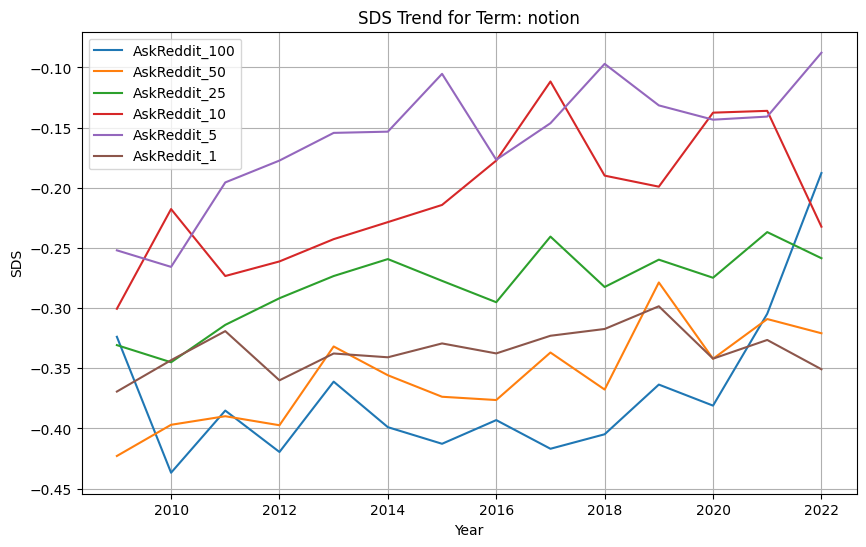

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term signal:
  Spearman Correlation: 0.2879120879120879, p-value: 0.3181928710258003
  Pearson Correlation: 0.30849588882148815, p-value: 0.28321691682598626
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term signal:
  Spearman Correlation: 0.01098901098901099, p-value: 0.970258390096969
  Pearson Correlation: 0.029549412720760566, p-value: 0.9201251039897629
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term signal:
  Spearman Correlation: 0.2087912087912088, p-value: 0.4737788373098136
  Pearson Correlation: 0.20790144616312697, p-value: 0.4757081411149742
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term signal:
  Spearman Correlation: -0.12967032967032965, p-value: 0.6586

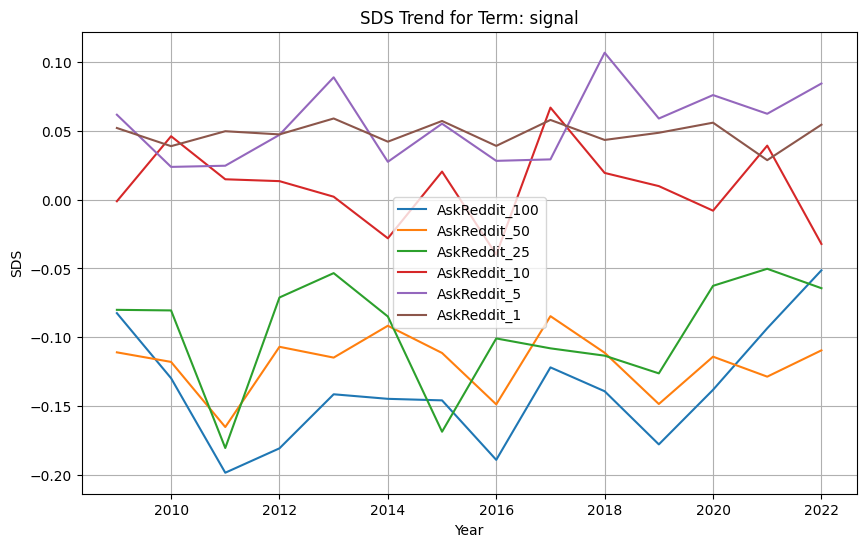

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term azure:
  Spearman Correlation: 0.8857142857142857, p-value: 2.5040044989174743e-05
  Pearson Correlation: 0.8771898841029032, p-value: 3.782425762779154e-05
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term azure:
  Spearman Correlation: 0.6879120879120879, p-value: 0.006540042491841915
  Pearson Correlation: 0.6858697006313988, p-value: 0.006767318508353545
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term azure:
  Spearman Correlation: 0.14285714285714285, p-value: 0.6261174762253241
  Pearson Correlation: 0.059026196823026574, p-value: 0.8411382181464235
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term azure:
  Spearman Correlation: 0.5076923076923077, p-value: 0.0

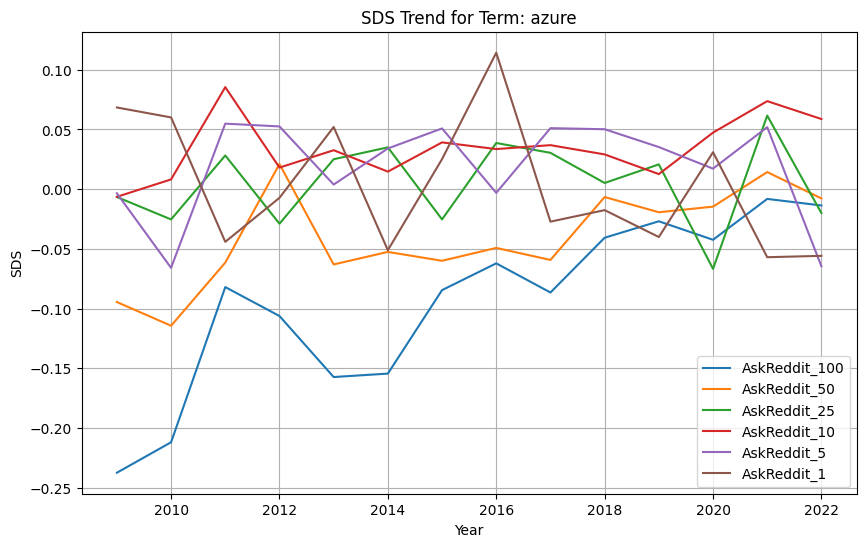

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term echo:
  Spearman Correlation: 0.45494505494505494, p-value: 0.10215352669182914
  Pearson Correlation: 0.49044060296275555, p-value: 0.07499362552839002
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term echo:
  Spearman Correlation: 0.7538461538461538, p-value: 0.001844725289257219
  Pearson Correlation: 0.8025634062304833, p-value: 0.0005506316625563627
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term echo:
  Spearman Correlation: -0.39780219780219783, p-value: 0.1589507745108348
  Pearson Correlation: -0.4608970502963276, p-value: 0.09718591432014055
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term echo:
  Spearman Correlation: 0.27472527472527475, p-value: 0.34182

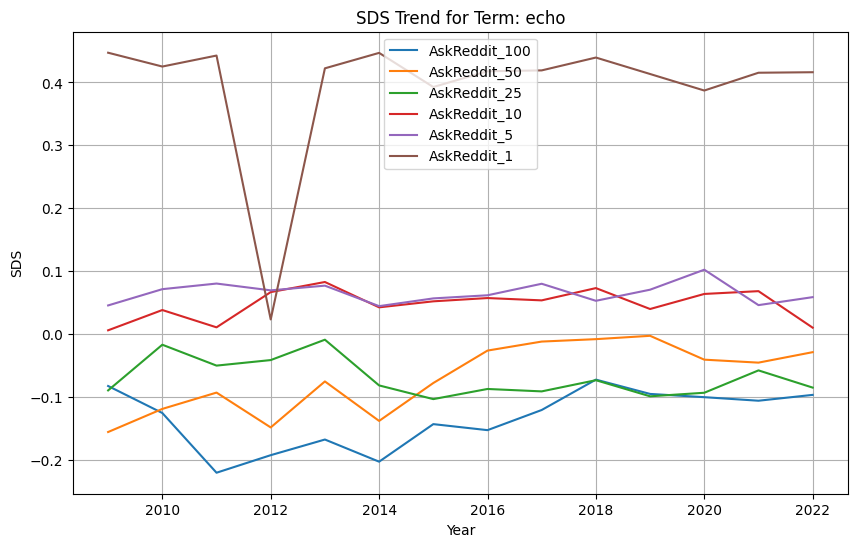

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term alexa:
  Spearman Correlation: 0.38461538461538464, p-value: 0.17450875077509556
  Pearson Correlation: 0.4262939515157458, p-value: 0.1285222133246681
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term alexa:
  Spearman Correlation: 0.745054945054945, p-value: 0.0022300373167420734
  Pearson Correlation: 0.7626935646833628, p-value: 0.0015122813922221988
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term alexa:
  Spearman Correlation: 0.7406593406593407, p-value: 0.002445197640446019
  Pearson Correlation: 0.730045731291134, p-value: 0.0030326966828226527
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term alexa:
  Spearman Correlation: 0.6087912087912088, p-value: 0.0208

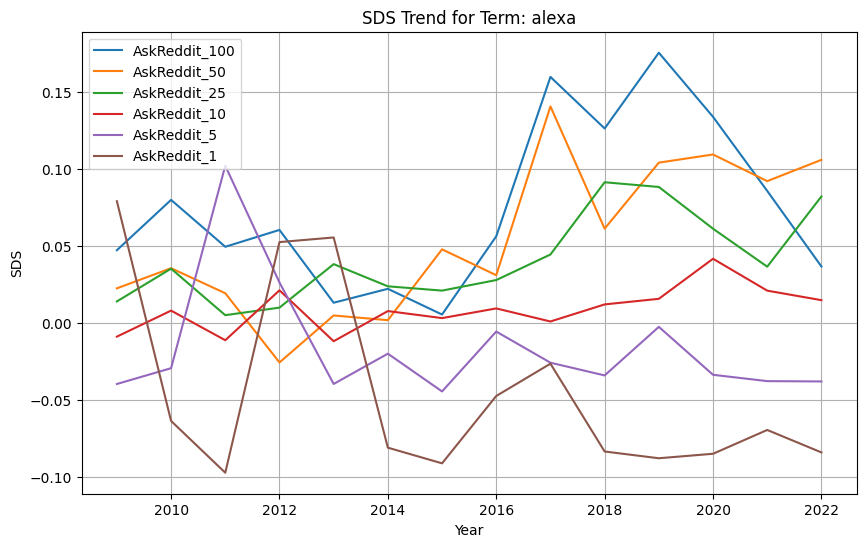

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term prime:
  Spearman Correlation: 0.8637362637362638, p-value: 6.846377605646043e-05
  Pearson Correlation: 0.8425355645280995, p-value: 0.0001553626544428435
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term prime:
  Spearman Correlation: 0.7010989010989012, p-value: 0.005211861769946939
  Pearson Correlation: 0.8172303401702805, p-value: 0.0003584740548172237
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term prime:
  Spearman Correlation: 0.7010989010989012, p-value: 0.005211861769946939
  Pearson Correlation: 0.8052920153251764, p-value: 0.0005097373221418366
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term prime:
  Spearman Correlation: 0.6527472527472528, p-value: 0

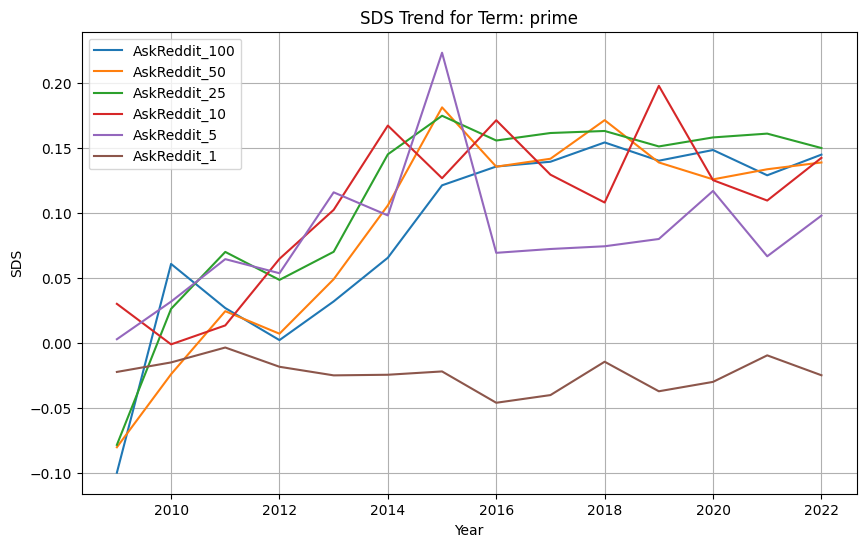

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term edge:
  Spearman Correlation: -0.49890109890109896, p-value: 0.06936352739715487
  Pearson Correlation: -0.508122928339309, p-value: 0.06357692045948646
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term edge:
  Spearman Correlation: 0.11208791208791209, p-value: 0.7028331631967695
  Pearson Correlation: 0.10876015580172849, p-value: 0.7113054846146059
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term edge:
  Spearman Correlation: -0.05054945054945055, p-value: 0.8637420361792153
  Pearson Correlation: -0.0024890860769999712, p-value: 0.9932620357814737
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term edge:
  Spearman Correlation: 0.35824175824175825, p-value: 0.208498

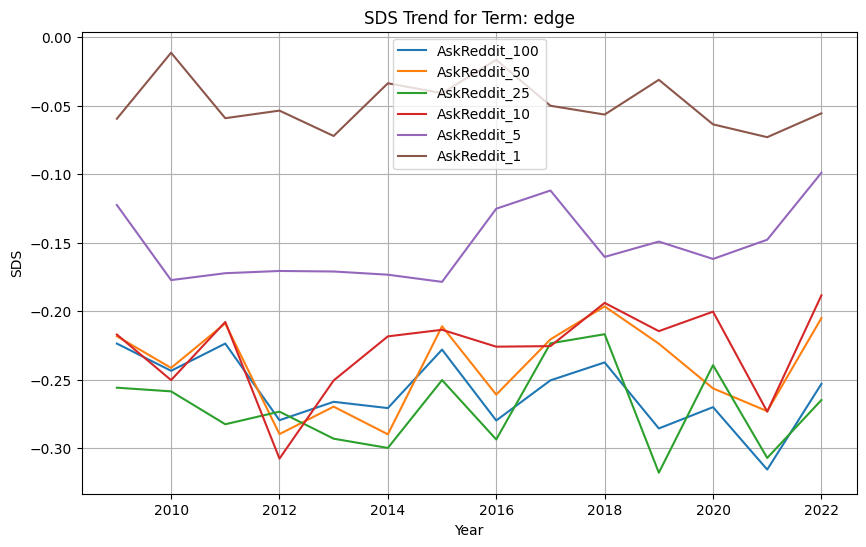

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term meta:
  Spearman Correlation: 0.7934065934065934, p-value: 0.0007075341356182061
  Pearson Correlation: 0.7885270423171179, p-value: 0.0008047034923157654
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term meta:
  Spearman Correlation: 0.49890109890109896, p-value: 0.06936352739715487
  Pearson Correlation: 0.6161278084975995, p-value: 0.01896393743389293
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term meta:
  Spearman Correlation: 0.5472527472527472, p-value: 0.04282204937819734
  Pearson Correlation: 0.502010236008992, p-value: 0.06737228986183787
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term meta:
  Spearman Correlation: 0.6131868131868132, p-value: 0.019706331

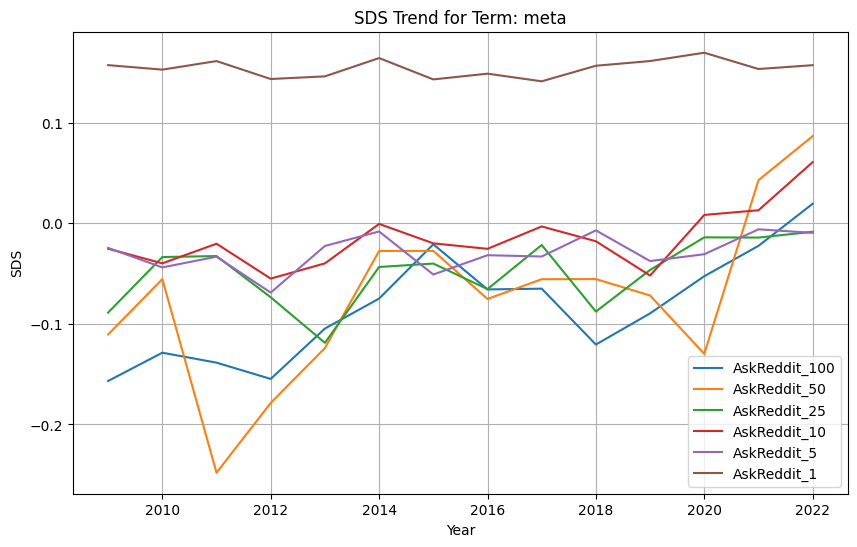

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term lightning:
  Spearman Correlation: 0.5296703296703297, p-value: 0.05141659813787076
  Pearson Correlation: 0.5235804907311545, p-value: 0.05466601509344178
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term lightning:
  Spearman Correlation: 0.5912087912087912, p-value: 0.025970813668962523
  Pearson Correlation: 0.5847278027676203, p-value: 0.02807475829415663
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term lightning:
  Spearman Correlation: 0.665934065934066, p-value: 0.00932299909684176
  Pearson Correlation: 0.7442140130294732, p-value: 0.002269994078620471
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term lightning:
  Spearman Correlation: 0.221978021978022, p-va

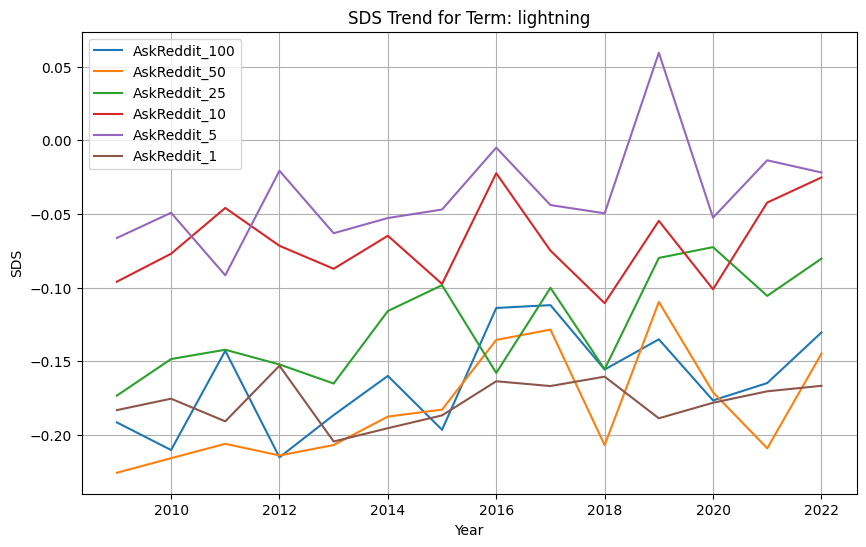

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term eats:
  Spearman Correlation: 0.389010989010989, p-value: 0.16921738979769044
  Pearson Correlation: 0.3116070161172357, p-value: 0.278136070612967
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term eats:
  Spearman Correlation: 0.7230769230769231, p-value: 0.003475294618094306
  Pearson Correlation: 0.6406719774580879, p-value: 0.013564039146591043
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term eats:
  Spearman Correlation: 0.7098901098901099, p-value: 0.004450741418764225
  Pearson Correlation: 0.7092281152768979, p-value: 0.004504824104106566
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term eats:
  Spearman Correlation: 0.367032967032967, p-value: 0.1967388717074

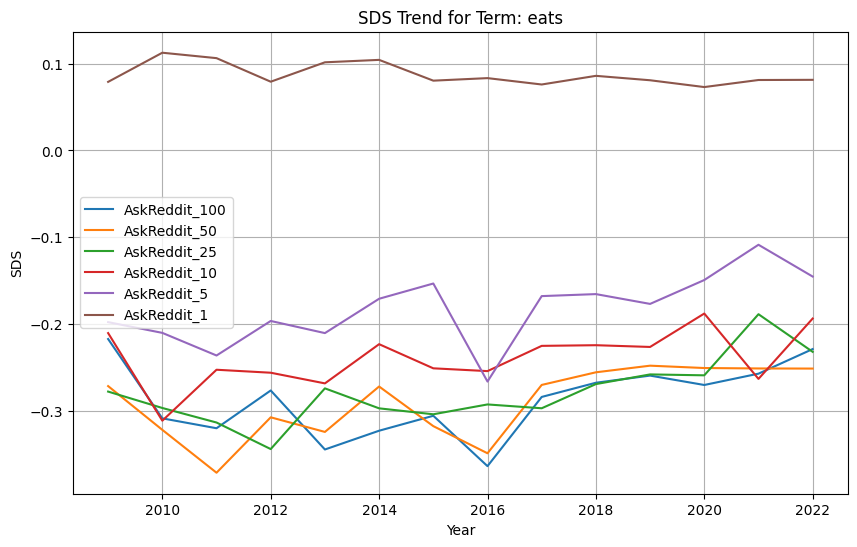

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term spark:
  Spearman Correlation: 0.2879120879120879, p-value: 0.3181928710258003
  Pearson Correlation: 0.5088674939806054, p-value: 0.06312531940220456
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term spark:
  Spearman Correlation: -0.24835164835164836, p-value: 0.39191953893845743
  Pearson Correlation: -0.25736281207463085, p-value: 0.3743890940246143
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term spark:
  Spearman Correlation: -0.4945054945054946, p-value: 0.07224967403413257
  Pearson Correlation: -0.45372109557923207, p-value: 0.10319636792594146
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term spark:
  Spearman Correlation: 0.2087912087912088, p-value: 0.4737

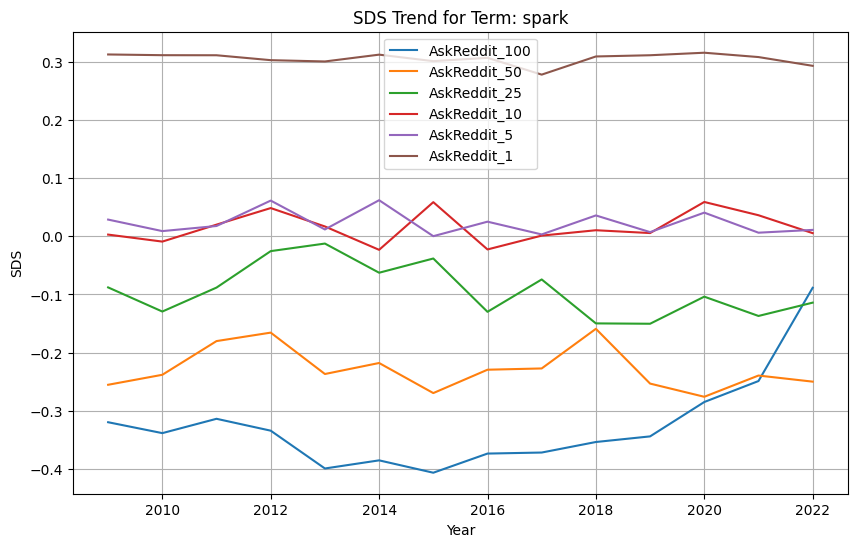

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, term corona:
  Spearman Correlation: 0.745054945054945, p-value: 0.0022300373167420734
  Pearson Correlation: 0.6913700679459955, p-value: 0.006168819357289746
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, term corona:
  Spearman Correlation: 0.7890109890109891, p-value: 0.0007946144116544928
  Pearson Correlation: 0.7382725982915146, p-value: 0.002568712857819125
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, term corona:
  Spearman Correlation: 0.6439560439560439, p-value: 0.012942152559322944
  Pearson Correlation: 0.664583868892005, p-value: 0.009519718523973758
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, term corona:
  Spearman Correlation: 0.7318681318681319, p-value: 0

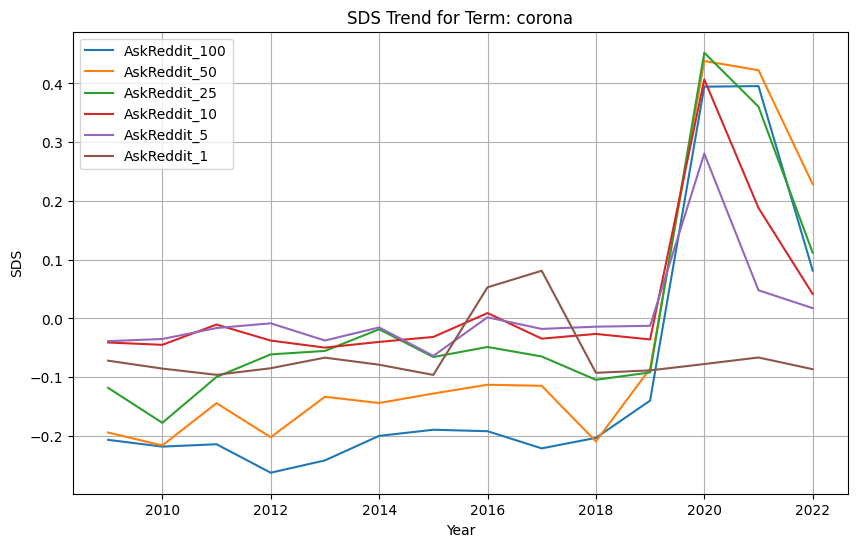

For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model, Dataset-wide:
  Spearman Correlation: 0.9648351648351648, p-value: 2.5304057544450237e-08
  Pearson Correlation: 0.9752124104532061, p-value: 3.174802561202929e-09
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model, Dataset-wide:
  Spearman Correlation: 0.9956043956043955, p-value: 1.0315953358848785e-13
  Pearson Correlation: 0.9834462926809493, p-value: 2.8668697118839567e-10
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_25_percent.model, Dataset-wide:
  Spearman Correlation: 0.956043956043956, p-value: 9.469782144566512e-08
  Pearson Correlation: 0.9681177995471856, p-value: 1.4155460293795243e-08
For model at /home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_10_percent.model, Dataset-wide:
  Spearman Correlation: 0.951648351648351

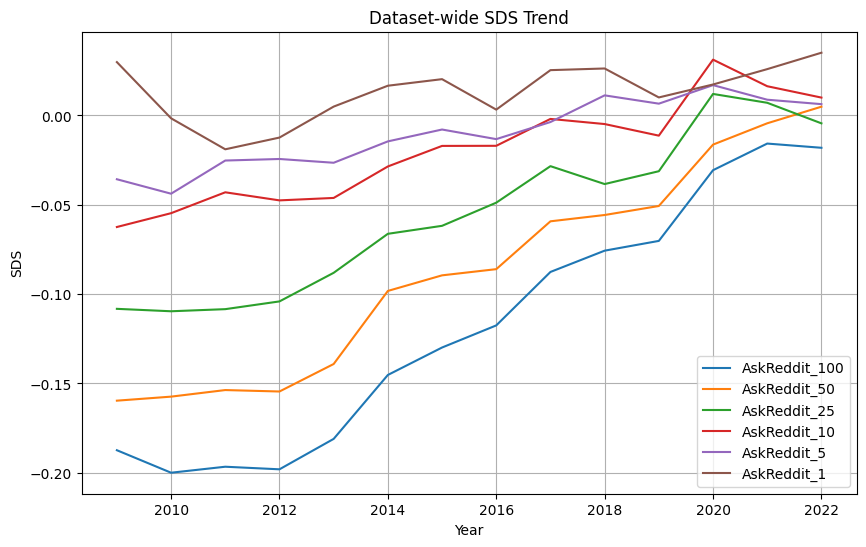

In [16]:

import gensim
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr, pearsonr
from collections import defaultdict


plt.style.use("default")

# Function to compute average vector
def compute_average_vector(words, model):
    vector_sum = 0
    count = 0
    for word in words:
        if word in model.wv.key_to_index:
            vector_sum += model.wv[word]
            count += 1
    return vector_sum / count if count != 0 else None

# Define years range
years = range(2009, 2023)

# Define your model paths
# model_paths = [
#     '/path/to/model1.model',
#     '/path/to/model2.model',
#     '/path/to/model3.model'
# ]

# Lists to collect dataset-wide similarities for each model
dataset_similarities_by_model = {path: defaultdict(list) for path in model_paths}

# Iterate through all terms
for index, row in known_shifts_df.iterrows():
    term = row['Term']
    before_words = row['Meaning Before'].split(', ')
    after_words = row['Meaning After'].split(', ')

    plt.figure(figsize=(10, 6))
    
    for model_path in model_paths:
        # Load the model
        model = gensim.models.Word2Vec.load(model_path)

        # Compute before and after vectors
        before_vector = compute_average_vector(before_words, model)
        after_vector = compute_average_vector(after_words, model)
        if before_vector is None or after_vector is None:
            continue  # Skip to next iteration if either vector is None

        # Compute projection vector
        projection_vector = after_vector - before_vector

        # Collect term-specific similarity scores
        term_similarities_by_year = []
        
        for year in years:
            term_year = f'{term}_{year}'
            if term_year in model.wv.key_to_index:
                term_vector = model.wv[term_year]
                similarity = 1 - cosine(projection_vector, term_vector)
                term_similarities_by_year.append(similarity)
                dataset_similarities_by_model[model_path][year].append(similarity)
        
        # Compute and print Spearman and Pearson correlations
        spearman_corr, spearman_p_value = spearmanr(term_similarities_by_year, years)
        pearson_corr, pearson_p_value = pearsonr(term_similarities_by_year, years)
        
        print(f"For model at {model_path}, term {term}:")
        print(f"  Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")
        print(f"  Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")

        
        # Plot
        plt.plot(years, term_similarities_by_year, label=f"AskReddit{model_path.split('/')[-1][22:][:-14]}")
    
    plt.xlabel('Year')
    plt.ylabel('SDS')
    plt.title(f'SDS Trend for Term: {term}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Dataset-wide analysis
plt.figure(figsize=(10, 6))

for model_path in model_paths:
    dataset_similarities = []
    
    for year in years:
        year_mean = np.mean(dataset_similarities_by_model[model_path][year])
        dataset_similarities.append(year_mean)
        
    # Compute and print dataset-wide Spearman and Pearson correlations
    spearman_corr, spearman_p_value = spearmanr(dataset_similarities, years)
    pearson_corr, pearson_p_value = pearsonr(dataset_similarities, years)
    
    print(f"For model at {model_path}, Dataset-wide:")
    print(f"  Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")
    print(f"  Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")

    
    # Plot dataset-wide similarities
    plt.plot(years, dataset_similarities, label=f"AskReddit{model_path.split('/')[-1][22:][:-14]}")

plt.xlabel('Year')
plt.ylabel('SDS')
plt.title('Dataset-wide SDS Trend')
plt.legend()
plt.grid(True)
plt.show()


## Here random natural with difference corpus size

In [ ]:
# # List of model paths
# model_paths = [
#     '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model',
#     '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_50_percent.model',
#     '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_25_percent.model',
#     '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_10_percent.model',
#     '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_5_percent.model',
#     '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_1_percent.model',

# ]

In [ ]:

# import gensim
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.spatial.distance import cosine
# from scipy.stats import spearmanr, pearsonr
# from collections import defaultdict

# # Function to compute average vector
# def compute_average_vector(words, model):
#     vector_sum = 0
#     count = 0
#     for word in words:
#         if word in model.wv.key_to_index:
#             vector_sum += model.wv[word]
#             count += 1
#     return vector_sum / count if count != 0 else None

# # Define years range
# years = range(2009, 2023)

# # Define your model paths
# # model_paths = [
# #     '/path/to/model1.model',
# #     '/path/to/model2.model',
# #     '/path/to/model3.model'
# # ]

# # Lists to collect dataset-wide similarities for each model
# dataset_similarities_by_model = {path: defaultdict(list) for path in model_paths}

# # Iterate through all terms
# for index, row in known_shifts_df.iterrows():
#     term = row['Term']
#     before_words = row['Meaning Before'].split(', ')
#     after_words = row['Meaning After'].split(', ')

#     plt.figure(figsize=(10, 6))
    
#     for model_path in model_paths:
#         # Load the model
#         model = gensim.models.Word2Vec.load(model_path)

#         # Compute before and after vectors
#         before_vector = compute_average_vector(before_words, model)
#         after_vector = compute_average_vector(after_words, model)
#         if before_vector is None or after_vector is None:
#             continue  # Skip to next iteration if either vector is None

#         # Compute projection vector
#         projection_vector = after_vector - before_vector

#         # Collect term-specific similarity scores
#         term_similarities_by_year = []
        
#         for year in years:
#             term_year = f'{term}_{year}'
#             if term_year in model.wv.key_to_index:
#                 term_vector = model.wv[term_year]
#                 similarity = 1 - cosine(projection_vector, term_vector)
#                 term_similarities_by_year.append(similarity)
#                 dataset_similarities_by_model[model_path][year].append(similarity)
        
#         # Compute and print Spearman and Pearson correlations
#         spearman_corr, spearman_p_value = spearmanr(term_similarities_by_year, years)
#         pearson_corr, pearson_p_value = pearsonr(term_similarities_by_year, years)
        
#         print(f"For model at {model_path}, term {term}:")
#         print(f"  Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")
#         print(f"  Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")

        
#         # Plot
#         plt.plot(years, term_similarities_by_year, label=f"Model: {model_path.split('/')[-1]}")
    
#     plt.xlabel('Year')
#     plt.ylabel('Mean Similarity Score')
#     plt.title(f'Similarity Trend for Term: {term}')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Dataset-wide analysis
# plt.figure(figsize=(10, 6))

# for model_path in model_paths:
#     dataset_similarities = []
    
#     for year in years:
#         year_mean = np.mean(dataset_similarities_by_model[model_path][year])
#         dataset_similarities.append(year_mean)
        
#     # Compute and print dataset-wide Spearman and Pearson correlations
#     spearman_corr, spearman_p_value = spearmanr(dataset_similarities, years)
#     pearson_corr, pearson_p_value = pearsonr(dataset_similarities, years)
    
#     print(f"For model at {model_path}, Dataset-wide:")
#     print(f"  Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")
#     print(f"  Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")

    
#     # Plot dataset-wide similarities
#     plt.plot(years, dataset_similarities, label=f"Model: {model_path.split('/')[-1]}")

# plt.xlabel('Year')
# plt.ylabel('Mean Similarity Score')
# plt.title('Dataset-wide Mean Similarity Trend')
# plt.legend()
# plt.grid(True)
# plt.show()


## Here random random with difference corpus size

In [1]:
# # List of model paths
# model_paths = [
#     '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model',
#     '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_50_percent.model',
#     '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_25_percent.model',
#     '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_10_percent.model',
#     '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_5_percent.model',
#     '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_1_percent.model',


# ]

In [ ]:

# import gensim
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.spatial.distance import cosine
# from scipy.stats import spearmanr, pearsonr
# from collections import defaultdict

# # Function to compute average vector
# def compute_average_vector(words, model):
#     vector_sum = 0
#     count = 0
#     for word in words:
#         if word in model.wv.key_to_index:
#             vector_sum += model.wv[word]
#             count += 1
#     return vector_sum / count if count != 0 else None

# # Define years range
# years = range(2009, 2023)

# # Define your model paths
# # model_paths = [
# #     '/path/to/model1.model',
# #     '/path/to/model2.model',
# #     '/path/to/model3.model'
# # ]

# # Lists to collect dataset-wide similarities for each model
# dataset_similarities_by_model = {path: defaultdict(list) for path in model_paths}

# # Iterate through all terms
# for index, row in known_shifts_df.iterrows():
#     term = row['Term']
#     before_words = row['Meaning Before'].split(', ')
#     after_words = row['Meaning After'].split(', ')

#     plt.figure(figsize=(10, 6))
    
#     for model_path in model_paths:
#         # Load the model
#         model = gensim.models.Word2Vec.load(model_path)

#         # Compute before and after vectors
#         before_vector = compute_average_vector(before_words, model)
#         after_vector = compute_average_vector(after_words, model)
#         if before_vector is None or after_vector is None:
#             continue  # Skip to next iteration if either vector is None

#         # Compute projection vector
#         projection_vector = after_vector - before_vector

#         # Collect term-specific similarity scores
#         term_similarities_by_year = []
        
#         for year in years:
#             term_year = f'{term}_{year}'
#             if term_year in model.wv.key_to_index:
#                 term_vector = model.wv[term_year]
#                 similarity = 1 - cosine(projection_vector, term_vector)
#                 term_similarities_by_year.append(similarity)
#                 dataset_similarities_by_model[model_path][year].append(similarity)
        
#         # Compute and print Spearman and Pearson correlations
#         spearman_corr, spearman_p_value = spearmanr(term_similarities_by_year, years)
#         pearson_corr, pearson_p_value = pearsonr(term_similarities_by_year, years)
        
#         print(f"For model at {model_path}, term {term}:")
#         print(f"  Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")
#         print(f"  Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")

        
#         # Plot
#         plt.plot(years, term_similarities_by_year, label=f"Model: {model_path.split('/')[-1]}")
    
#     plt.xlabel('Year')
#     plt.ylabel('Mean Similarity Score')
#     plt.title(f'Similarity Trend for Term: {term}')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Dataset-wide analysis
# plt.figure(figsize=(10, 6))

# for model_path in model_paths:
#     dataset_similarities = []
    
#     for year in years:
#         year_mean = np.mean(dataset_similarities_by_model[model_path][year])
#         dataset_similarities.append(year_mean)
        
#     # Compute and print dataset-wide Spearman and Pearson correlations
#     spearman_corr, spearman_p_value = spearmanr(dataset_similarities, years)
#     pearson_corr, pearson_p_value = pearsonr(dataset_similarities, years)
    
#     print(f"For model at {model_path}, Dataset-wide:")
#     print(f"  Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")
#     print(f"  Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")

    
#     # Plot dataset-wide similarities
#     plt.plot(years, dataset_similarities, label=f"Model: {model_path.split('/')[-1]}")

# plt.xlabel('Year')
# plt.ylabel('Mean Similarity Score')
# plt.title('Dataset-wide Mean Similarity Trend')
# plt.legend()
# plt.grid(True)
# plt.show()


### bootstrapped 

In [7]:
# Define your original model paths and their corresponding bootstrapped models
model_paths = {
       'Original': [
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_1.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_2.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_3.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_4.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_5.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_6.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_7.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_8.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_9.model",
    '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model' #,
    # '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model'

    ],
    
    'Random_Natural': [
    '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_100_percent.model',
    # '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_50_percent.model',
    # '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_natural_sampled_word2vec_model_25_percent.model',

],
    'Random': [
    '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_100_percent.model',
    # '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_50_percent.model',
    # '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/random_sampled_word2vec_model_25_percent.model',


]
}

In [ ]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr, pearsonr
from collections import defaultdict
plt.style.use("default")

# Function to compute average vector
def compute_average_vector(words, model):
    vector_sum = 0
    count = 0
    for word in words:
        if word in model.wv.key_to_index:
            vector_sum += model.wv[word]
            count += 1
    return vector_sum / count if count != 0 else None

# Define years range
years = range(2009, 2023)

# Dictionary to collect dataset-wide similarities for each aggregated model
dataset_similarities_by_model = defaultdict(list)

# Iterate through all terms
for index, row in known_shifts_df.iterrows():
    term = row['Term']
    before_words = row['Meaning Before'].split(', ')
    after_words = row['Meaning After'].split(', ')

    plt.figure(figsize=(10, 6))
    
    for model_name, bootstrap_models in model_paths.items():
        aggregated_term_similarities_by_year = []
        
        # Aggregate over bootstrapped models
        for model_path in bootstrap_models:
            # Load the model
            model = gensim.models.Word2Vec.load(model_path)

            # Compute before and after vectors
            before_vector = compute_average_vector(before_words, model)
            after_vector = compute_average_vector(after_words, model)
            if before_vector is None or after_vector is None:
                continue  # Skip to next iteration if either vector is None

            # Compute projection vector
            projection_vector = after_vector - before_vector

            # Collect term-specific similarity scores
            term_similarities_by_year = []
            
            for year in years:
                term_year = f'{term}_{year}'
                if term_year in model.wv.key_to_index:
                    term_vector = model.wv[term_year]
                    similarity = 1 - cosine(projection_vector, term_vector)
                    term_similarities_by_year.append(similarity)
                    
            if term_similarities_by_year:
                aggregated_term_similarities_by_year.append(term_similarities_by_year)
        
        # Average the term similarities across bootstrapped models
        mean_term_similarities = np.mean(aggregated_term_similarities_by_year, axis=0)
        dataset_similarities_by_model[model_name].append(mean_term_similarities)
        
        # Compute and print Spearman and Pearson correlations
        spearman_corr, spearman_p_value = spearmanr(mean_term_similarities, years)
        pearson_corr, pearson_p_value = pearsonr(mean_term_similarities, years)
        
        print(f"For aggregated model {model_name}, term {term}:")
        print(f"  Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")
        print(f"  Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")
        
        # Plot
        plt.plot(years, mean_term_similarities, label=f"Aggregated Model: {model_name}")
    
    plt.xlabel('Year')
    plt.ylabel('Mean Similarity Score')
    plt.title(f'Similarity Trend for Term: {term}')
    plt.ylim(-0.35, 0.35)
    plt.legend()
    plt.grid(True)
    plt.show()

# Dataset-wide analysis
plt.figure(figsize=(10, 6))

for model_name in model_paths.keys():
    aggregated_dataset_similarities = np.mean(dataset_similarities_by_model[model_name], axis=0)
    
    # Compute and print dataset-wide Spearman and Pearson correlations
    spearman_corr, spearman_p_value = spearmanr(aggregated_dataset_similarities, years)
    pearson_corr, pearson_p_value = pearsonr(aggregated_dataset_similarities, years)
    
    print(f"For aggregated model {model_name}, Dataset-wide:")
    print(f"  Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")
    print(f"  Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")
    
    # Plot dataset-wide similarities
    plt.plot(years, aggregated_dataset_similarities, label=f"Aggregated Model: {model_name}")

plt.xlabel('Year')
plt.ylabel('Mean Similarity Score')
plt.title('Dataset-wide Mean Similarity Trend')
plt.ylim(-0.15, 0.15)
plt.legend()
plt.grid(True)
plt.show()


## confidence intervals below (working code but results too wide)

For aggregated model Original, term tinder:
  Spearman Correlation: 0.7802197802197802, p-value: 0.0009944938002309496
  Pearson Correlation: 0.8499926490750259, p-value: 0.00011811597896176452
For aggregated model Random_Natural, term tinder:
  Spearman Correlation: 0.8285714285714285, p-value: 0.000250534270865576
  Pearson Correlation: 0.8660217572572575, p-value: 6.217702916276488e-05
For aggregated model Random, term tinder:
  Spearman Correlation: 0.3230769230769231, p-value: 0.25987361950878973
  Pearson Correlation: 0.07898787139740353, p-value: 0.7883842200901879


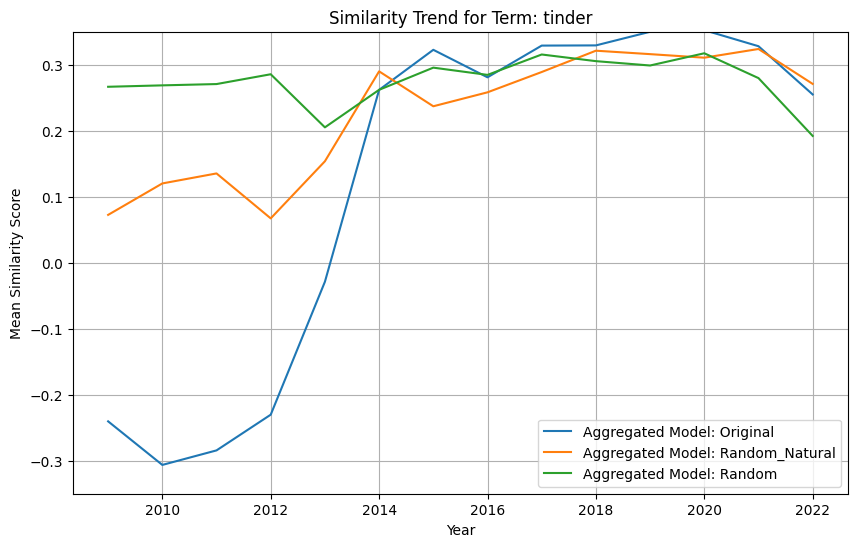

For aggregated model Original, term zoom:
  Spearman Correlation: 0.7010989010989012, p-value: 0.005211861769946939
  Pearson Correlation: 0.715829563320726, p-value: 0.003987920595763552
For aggregated model Random_Natural, term zoom:
  Spearman Correlation: -0.002197802197802198, p-value: 0.9940505286658998
  Pearson Correlation: -0.0553300558238869, p-value: 0.8509812406149649
For aggregated model Random, term zoom:
  Spearman Correlation: 0.17362637362637365, p-value: 0.5527669411422413
  Pearson Correlation: 0.09775654354106793, p-value: 0.7395368013195008


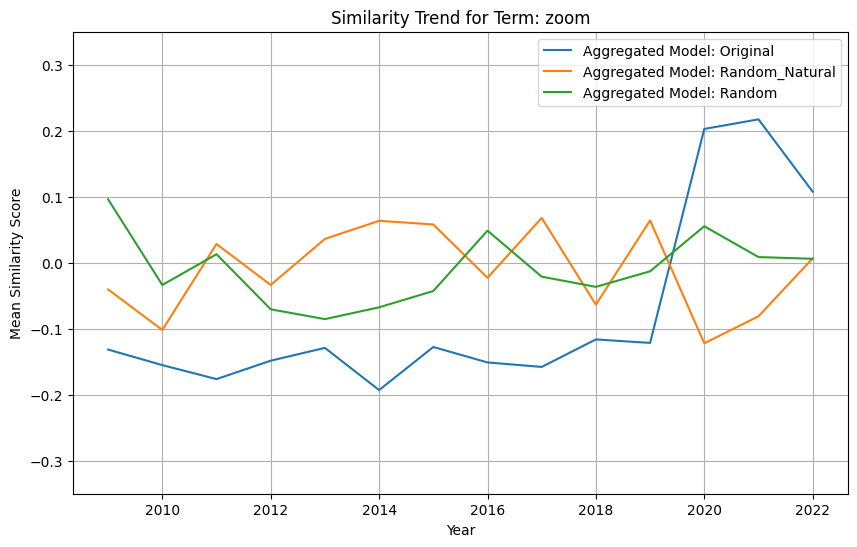

For aggregated model Original, term telegram:
  Spearman Correlation: 0.621978021978022, p-value: 0.017550315290540047
  Pearson Correlation: 0.6011008300627241, p-value: 0.02299008538837029
For aggregated model Random_Natural, term telegram:
  Spearman Correlation: -0.3494505494505495, p-value: 0.22068999774644735
  Pearson Correlation: -0.337030374893363, p-value: 0.23865486044111434
For aggregated model Random, term telegram:
  Spearman Correlation: -0.6527472527472528, p-value: 0.01138457399795419
  Pearson Correlation: -0.6794397234594985, p-value: 0.007523144463853475


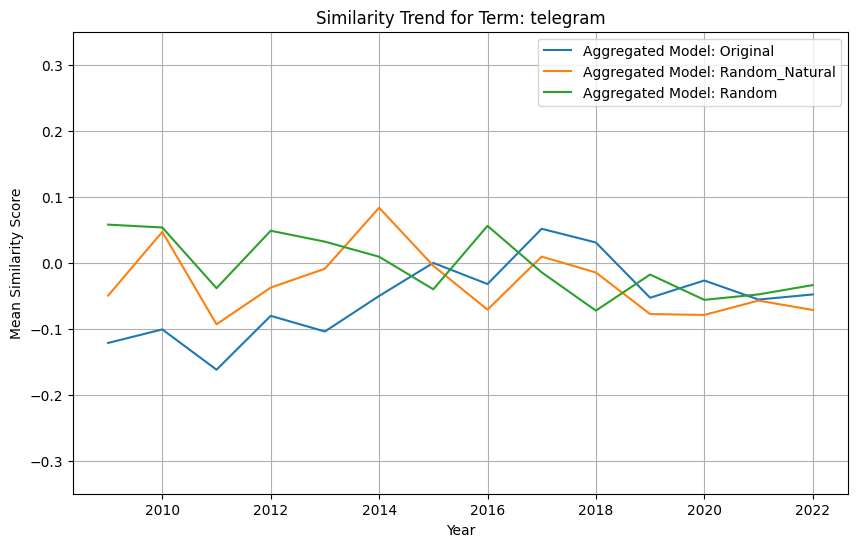

For aggregated model Original, term twitch:
  Spearman Correlation: 0.9604395604395607, p-value: 5.081053892329076e-08
  Pearson Correlation: 0.923454324024916, p-value: 2.4586135566018954e-06
For aggregated model Random_Natural, term twitch:
  Spearman Correlation: -0.44175824175824174, p-value: 0.11377750302872344
  Pearson Correlation: -0.3360413434728274, p-value: 0.24012275112376602
For aggregated model Random, term twitch:
  Spearman Correlation: 0.38461538461538464, p-value: 0.17450875077509556
  Pearson Correlation: 0.3423156286170473, p-value: 0.23090402251845743


KeyboardInterrupt: 

In [9]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr, pearsonr, t
from collections import defaultdict

# Function to compute average vector
def compute_average_vector(words, model):
    vector_sum = 0
    count = 0
    for word in words:
        if word in model.wv.key_to_index:
            vector_sum += model.wv[word]
            count += 1
    return vector_sum / count if count != 0 else None

# Define years range
years = range(2009, 2023)

# Dictionary to collect dataset-wide similarities for each aggregated model
dataset_similarities_by_model = defaultdict(list)

# Iterate through all terms
for index, row in known_shifts_df.iterrows():
    term = row['Term']
    before_words = row['Meaning Before'].split(', ')
    after_words = row['Meaning After'].split(', ')

    plt.figure(figsize=(10, 6))
    
    for model_name, bootstrap_models in model_paths.items():
        aggregated_term_similarities_by_year = []
        
        # Aggregate over bootstrapped models
        for model_path in bootstrap_models:
            # Load the model
            model = gensim.models.Word2Vec.load(model_path)

            # Compute before and after vectors
            before_vector = compute_average_vector(before_words, model)
            after_vector = compute_average_vector(after_words, model)
            if before_vector is None or after_vector is None:
                continue  # Skip to next iteration if either vector is None

            # Compute projection vector
            projection_vector = after_vector - before_vector

            # Collect term-specific similarity scores
            term_similarities_by_year = []
            
            for year in years:
                term_year = f'{term}_{year}'
                if term_year in model.wv.key_to_index:
                    term_vector = model.wv[term_year]
                    similarity = 1 - cosine(projection_vector, term_vector)
                    term_similarities_by_year.append(similarity)
                    
            if term_similarities_by_year:
                aggregated_term_similarities_by_year.append(term_similarities_by_year)
        
        # Average the term similarities across bootstrapped models
        mean_term_similarities = np.mean(aggregated_term_similarities_by_year, axis=0)
        std_err = np.std(aggregated_term_similarities_by_year, axis=0) / np.sqrt(len(bootstrap_models))  ### New Code ###
        ci = t.ppf(0.975, len(bootstrap_models)-1) * std_err  ### New Code ###
        
        dataset_similarities_by_model[model_name].append(mean_term_similarities)
        
        # Compute and print Spearman and Pearson correlations
        spearman_corr, spearman_p_value = spearmanr(mean_term_similarities, years)
        pearson_corr, pearson_p_value = pearsonr(mean_term_similarities, years)
        
        print(f"For aggregated model {model_name}, term {term}:")
        print(f"  Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")
        print(f"  Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")
        
        # Plot
        plt.plot(years, mean_term_similarities, label=f"Aggregated Model: {model_name}")
        plt.fill_between(years, mean_term_similarities - ci, mean_term_similarities + ci, alpha=0.2)  ### New Code ###
    
    plt.xlabel('Year')
    plt.ylabel('Mean Similarity Score')
    plt.title(f'Similarity Trend for Term: {term}')
    plt.ylim(-0.35, 0.35)
    plt.legend()
    plt.grid(True)
    plt.show()

# Dataset-wide analysis
plt.figure(figsize=(10, 6))

for model_name in model_paths.keys():
    aggregated_dataset_similarities = np.mean(dataset_similarities_by_model[model_name], axis=0)
    std_err_dataset = np.std(dataset_similarities_by_model[model_name], axis=0) / np.sqrt(len(bootstrap_models))  ### New Code ###
    ci_dataset = t.ppf(0.975, len(bootstrap_models)-1) * std_err_dataset  ### New Code ###
    
    # Compute and print dataset-wide Spearman and Pearson correlations
    spearman_corr, spearman_p_value = spearmanr(aggregated_dataset_similarities, years)
    pearson_corr, pearson_p_value = pearsonr(aggregated_dataset_similarities, years)
    
    print(f"For aggregated model {model_name}, Dataset-wide:")
    print(f"  Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")
    print(f"  Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")
    
    # Plot dataset-wide similarities
    plt.plot(years, aggregated_dataset_similarities, label=f"Aggregated Model: {model_name}")
    plt.fill_between(years, aggregated_dataset_similarities - ci_dataset, aggregated_dataset_similarities + ci_dataset, alpha=0.2)  ### New Code ###

plt.xlabel('Year')
plt.ylabel('Mean Similarity Score')
plt.title('Dataset-wide Mean Similarity Trend')
plt.ylim(-0.15, 0.15)
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import json
with open('word_lists.json', 'r') as json_file:
    loaded_word_lists = json.load(json_file)

In [11]:
loaded_word_lists


{'inexpensive': ['lowbudget',
  'affordable',
  'cheap',
  'costeffective',
  'competitive',
  'basic',
  'lowend',
  'lowcost',
  'modest',
  'giveaway',
  'economical'],
 'expensive': ['unaffordable',
  'exorbitant',
  'costly',
  'luxury',
  'lavish',
  'excessive',
  'premium',
  'overpriced',
  'pricey',
  'extravagant'],
 'sustainable': ['ecological',
  'continuous',
  'viable',
  'feasible',
  'acceptable',
  'lasting',
  'indestructible',
  'livable',
  'renewable',
  'tolerable'],
 'unsustainable': ['untenable',
  'unfeasible',
  'depleted',
  'wasteful',
  'drained',
  'temporary',
  'impractical',
  'unstable',
  'inefficient',
  'exhausted'],
 'tasty': ['delicious',
  'yummy',
  'sweet',
  'spicy',
  'juicy',
  'flavorful',
  'appetizing',
  'comforting',
  'savory',
  'edible'],
 'tasteless': ['disgusting',
  'bland',
  'plain',
  'flat',
  'filthy',
  'yucky',
  'watery',
  'flavorless',
  'thin',
  'insipid'],
 'healthy': ['hygienic',
  'healing',
  'nutritional',
  'fre

In [53]:
# Define your original model paths and their corresponding bootstrapped models
model_paths = {
    'Original': [
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_1.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_2.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_3.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_4.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_5.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_6.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_7.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_8.model",
    # "/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/newest_bootstrap_word2vec_model_9.model",
    '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_100_percent.model'#,
    # '/home/ma/ma_ma/ma_sguliyev/New_thesis_repository/Notebooks/sampled_word2vec_model_50_percent.model'

    ]
    

}

In [62]:
import pandas as pd

# Other imports remain the same

# Function to find top 50 nearest vectors
def top_100_nearest_vectors(vector, model):
    if vector is not None:
        return [word for word, _ in model.wv.similar_by_vector(vector, topn=100)]
    else:
        return []


def top_100_nearest_vectors_not_temporal(vector, model):
    if vector is not None:
        all_nearest = model.wv.similar_by_vector(vector, topn=400)
        filtered_nearest = [word for word, _ in all_nearest if '_2' not in word][:20]
        return filtered_nearest
    else:
        return []


# 1 plot all perceptions 

('inexpensive', 'expensive')
Mean SDS = -0.09361841502998557
(-0.4021978021978022, 0.15397442954140356)
('sustainable', 'unsustainable')
Mean SDS = 0.1763558675135885
(0.6263736263736264, 0.016541935428871186)
('tasty', 'tasteless')
Mean SDS = 0.2405656554869243
(0.4065934065934066, 0.14910193900151342)
('healthy', 'unhealthy')
Mean SDS = -0.0007096391179532345
(-0.0945054945054945, 0.7479382611415478)
('ethical', 'unethical')
Mean SDS = 0.11605489520089966
(0.01978021978021978, 0.9464892274080114)
('natural', 'unnatural')
Mean SDS = 0.10757301095873117
(0.8065934065934066, 0.0004911128961691055)
('convenient', 'inconvenient')
Mean SDS = 0.12511175418538706
(0.7406593406593407, 0.002445197640446019)


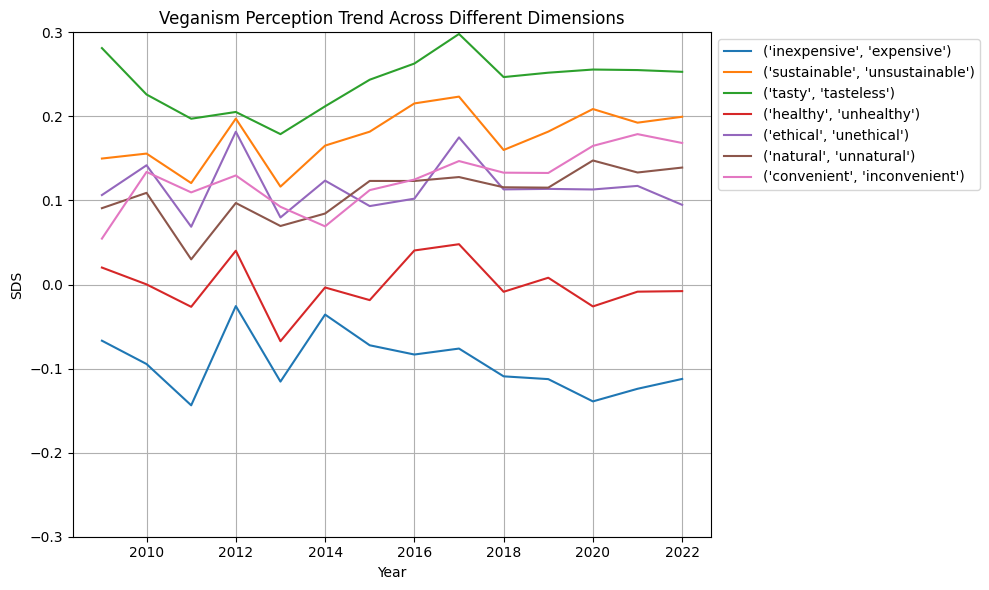

(0.4593406593406593, 0.09846837616829027)


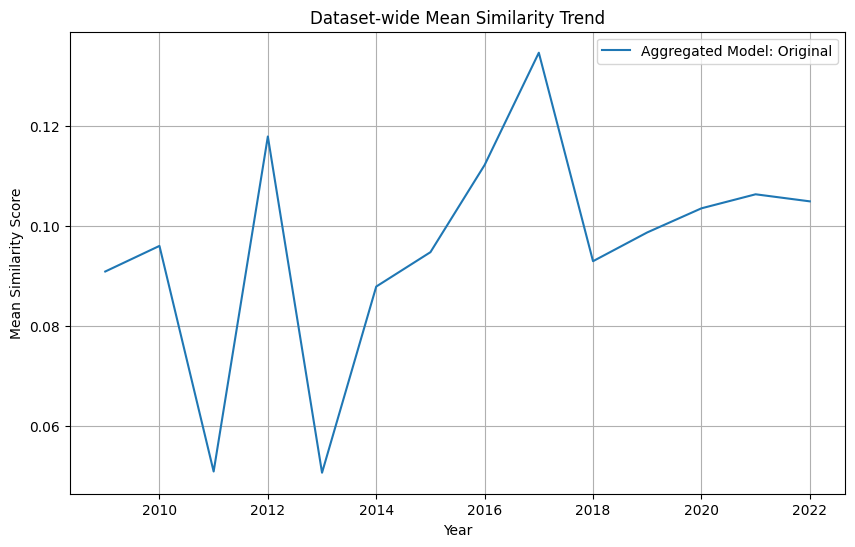

In [77]:

import gensim
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr, pearsonr
from collections import defaultdict
plt.style.use("default")

# Function to compute average vector
def compute_average_vector(words, model):
    vector_sum = 0
    count = 0
    for word in words:
        if word in model.wv.key_to_index:
            vector_sum += model.wv[word]
            count += 1
    return vector_sum / count if count != 0 else None

# Function to construct meaning cluster
def construct_meaning_cluster(term, opposite_term, model, n, loaded_word_lists):
    neighbors = [w for w, _ in model.wv.most_similar(term, topn=n) if "_" not in w and w != opposite_term]
    neighbors = [term] + neighbors  # Include the term itself as the first neighbor
    neighbors.extend(loaded_word_lists.get(term, []))  # Extend with synonyms
    return list(set(neighbors))  # Remove duplicates

def compute_correlations(years, similarities):
    # pearson_corr, pearson_pval = pearsonr(years, similarities)
    spearman_corr, spearman_pval = spearmanr(years, similarities)
    return spearman_corr, spearman_pval

# Define years range
years = range(2009, 2023)
# vegan_terms = ['vegan', 'vegans', 'veganism']
vegan_terms = ['vegan']



# vegan_terms = ['tinder']


term_pairs = [
    ('inexpensive', 'expensive'),
    ('sustainable', 'unsustainable'),
    ('tasty', 'tasteless'),
    ('healthy', 'unhealthy'),
    ('ethical', 'unethical'),
    ('natural', 'unnatural'),
    ('convenient', 'inconvenient')
]

# term_pairs = top_20_pairs

n_neighbors = 25  # Number of closest neighbors to find
# Dictionary to collect dataset-wide similarities for each aggregated model
dataset_similarities_by_model = defaultdict(list)

# Dictionary to define model paths
# Replace 'model_path_1' with the actual path of the model
plt.figure(figsize=(10, 6))

for pair in term_pairs:

    for model_name, bootstrap_models in model_paths.items():
        aggregated_term_similarities_by_year = []
        
        for model_path in bootstrap_models:


            # Load the model
            model = gensim.models.Word2Vec.load(model_path)

            # Compute average vegan vector for each year
            vegan_vectors_by_year = [compute_average_vector([f"{term}_{year}" for term in vegan_terms], model) for year in years]
            vegan_vectors_by_year = [v for v in vegan_vectors_by_year if v is not None]



            # Construct meaning clusters
            pos_cluster = construct_meaning_cluster(pair[0], pair[1], model, n_neighbors, loaded_word_lists)
            neg_cluster = construct_meaning_cluster(pair[1], pair[0], model, n_neighbors, loaded_word_lists)

            # Remove common words from opposing word clusters
            pos_cluster = [w for w in pos_cluster if w not in neg_cluster]
            neg_cluster = [w for w in neg_cluster if w not in pos_cluster]


            
            # Compute before and after vectors
            before_vector = compute_average_vector(neg_cluster, model)
            after_vector = compute_average_vector(pos_cluster, model)
            
            if before_vector is None or after_vector is None:
                continue  # Skip to next iteration if either vector is None

            # Compute projection vector
            projection_vector = after_vector - before_vector

            # Project the averaged vegan-related vectors onto the projection vector
            projected_similarities_by_year = [1 - cosine(projection_vector, vegan_vector) for vegan_vector in vegan_vectors_by_year]

            if projected_similarities_by_year:
                aggregated_term_similarities_by_year.append(projected_similarities_by_year)



            # Define a dictionary to hold the top 50 nearest vectors per year
            nearest_vectors_per_year = defaultdict(list)
            nearest_vectors_per_year_no_temporal = defaultdict(list)



            for year, vegan_vector in zip(years, vegan_vectors_by_year):
                nearest_vectors = top_100_nearest_vectors(vegan_vector, model)
                nearest_vectors_per_year[f"vegan_{year}"].extend(nearest_vectors)

                nearest_vectors_no_temporal = top_100_nearest_vectors_not_temporal(vegan_vector, model)
                nearest_vectors_per_year_no_temporal[f"vegan_{year}"].extend(nearest_vectors_no_temporal)

# Convert the dictionary to a DataFrame
            nearest_vectors_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in nearest_vectors_per_year.items()]))
            nearest_vectors_df_no_temporal = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in nearest_vectors_per_year_no_temporal.items()]))
# Your existing plotting code remains the same

        # print(pos_cluster)
        # print(neg_cluster)

        # Average the term similarities across bootstrapped models
        mean_term_similarities = np.mean(aggregated_term_similarities_by_year, axis=0)

        # Calculate the standard error
        standard_error = np.std(aggregated_term_similarities_by_year, axis=0) / np.sqrt(len(aggregated_term_similarities_by_year))

        # Calculate the 95% confidence interval
        lower_bound = mean_term_similarities - 1.96 * standard_error
        upper_bound = mean_term_similarities + 1.96 * standard_error

        # Add to dataset-wide list
        dataset_similarities_by_model[model_name].append(mean_term_similarities)

        # Plot the mean similarities
        plt.plot(years[:len(mean_term_similarities)], mean_term_similarities, label=f"{pair}")#, label=f"Aggregated Model: {model_name}")

        print(pair)

        print(f"Mean SDS = {np.mean(mean_term_similarities)}")

        # Plot the 95% confidence interval as a shaded area
        plt.fill_between(years[:len(mean_term_similarities)], lower_bound, upper_bound, alpha=0.2)#, label='95% CI')

        print(compute_correlations(years, mean_term_similarities))

plt.xlabel('Year')
plt.ylabel('SDS')
plt.ylim(-0.3,0.3)
plt.title('Veganism Perception Trend Across Different Dimensions')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Dataset-wide analysis
plt.figure(figsize=(10, 6))

for model_name in model_paths.keys():
    aggregated_dataset_similarities = np.mean(dataset_similarities_by_model[model_name], axis=0)
    plt.plot(years[:len(aggregated_dataset_similarities)], aggregated_dataset_similarities, label=f"Aggregated Model: {model_name}")
    print(compute_correlations(years,aggregated_dataset_similarities))


plt.xlabel('Year')
plt.ylabel('Mean Similarity Score')
plt.title('Dataset-wide Mean Similarity Trend')
plt.legend()
plt.grid(True)
plt.show()



In [78]:
nearest_vectors_df[1:11]

vegan_2009  vegan_2010  vegan_2011  vegan_2012  vegan_2013  vegan_2014  \
1   vegan_2018  vegan_2017  vegan_2019  vegan_2019  vegan_2020  vegan_2020   
2   vegan_2020  vegan_2020  vegan_2021  vegan_2020  vegan_2015  vegan_2013   
3   vegan_2021  vegan_2018  vegan_2020  vegan_2016  vegan_2021  vegan_2019   
4   vegan_2019  vegan_2015  vegan_2013  vegan_2021  vegan_2018  vegan_2021   
5   vegan_2022  vegan_2013  vegan_2014  vegan_2014  vegan_2019  vegan_2017   
6   vegan_2013  vegan_2021  vegan_2018  vegan_2017  vegan_2014  vegan_2018   
7   vegan_2017  vegan_2019  vegan_2017  vegan_2015  vegan_2017  vegan_2015   
8   vegan_2010  vegan_2016  vegan_2015  vegan_2018  vegan_2016  vegan_2011   
9   vegan_2012  vegan_2012  vegan_2016  vegan_2013  vegan_2011  vegan_2012   
10  vegan_2016  vegan_2011  vegan_2010  vegan_2010  vegan_2022  vegan_2022   

    vegan_2015  vegan_2016  vegan_2017  vegan_2018  vegan_2019  vegan_2020  \
1   vegan_2020  vegan_2019  vegan_2020  vegan_2019  vegan_2020  vegan_2021   
2   vegan_2019  vegan_2020  vegan_2019  vegan_2020  vegan_2021  vegan_2019   
3   vegan_2017  vegan_2018  vegan_2018  vegan_2021  vegan_2018  vegan_2018   
4   vegan_2021  vegan_2021  vegan_2021  vegan_2017  vegan_2017  vegan_2022   
5   vegan_2016  vegan_2017  vegan_2015  vegan_2016  vegan_2016  vegan_2017   
6   vegan_2018  vegan_2015  vegan_2016  vegan_2015  vegan_2015  vegan_2015   
7   vegan_2013  vegan_2013  vegan_2013  vegan_2013  vegan_2022  vegan_2016   
8   vegan_2022  vegan_2012  vegetarian  vegetarian  vegan_2013  vegan_2013   
9   vegan_2014  vegan_2014  vegan_2014  vegan_2022  vegan_2014  vegetarian   
10  vegan_2010  vegan_2022  vegan_2010  vegan_2014  vegetarian  vegan_2014   

    vegan_2021   vegan_2022  
1   vegan_2020   vegan_2021  
2   vegan_2019   vegan_2020  
3   vegan_2022   vegan_2019  
4   vegan_2018   plantbased  
5   vegan_2017   vegan_2018  
6   vegan_2016   vegan_2015  
7   vegan_2015  vegans_2021  
8   vegan_2013   vegan_2013  
9   vegan_2014   vegan_2014  
10  vegan_2011   vegan_2016

In [79]:
nearest_vectors_df_no_temporal[:10]

vegan_2009     vegan_2010     vegan_2011     vegan_2012     vegan_2013  \
0     vegetarian     vegetarian     vegetarian     vegetarian     vegetarian   
1        lowcarb        lowcarb     glutenfree     glutenfree     glutenfree   
2  vegetarianism          paleo          paleo     plantbased        lowcarb   
3     glutenfree     plantbased        lowcarb    vegetarians     plantbased   
4    vegetarians     glutenfree     plantbased  vegetarianism          paleo   
5       omnivore  vegetarianism         lowfat        lowcarb  vegetarianism   
6          paleo    vegetarians      carnivore          paleo         lowfat   
7     plantbased       omnivore  vegetarianism      carnivore    vegetarians   
8      carnivore      carnivore    vegetarians       omnivore      ketogenic   
9           keto           keto           keto      ketogenic      carnivore   

      vegan_2014     vegan_2015     vegan_2016     vegan_2017     vegan_2018  \
0     vegetarian     vegetarian     vegetarian     vegetarian     vegetarian   
1          paleo     glutenfree     glutenfree     glutenfree     glutenfree   
2        lowcarb     plantbased        lowcarb        lowcarb     plantbased   
3     glutenfree        lowcarb     plantbased     plantbased        lowcarb   
4  vegetarianism          paleo    vegetarians  vegetarianism  vegetarianism   
5     plantbased  vegetarianism          paleo          paleo          paleo   
6      carnivore    vegetarians  vegetarianism    vegetarians    vegetarians   
7       omnivore      ketogenic           keto           keto      carnivore   
8      ketogenic      carnivore       omnivore      carnivore       omnivore   
9           keto     omnivorous      ketogenic         gluten     omnivorous   

      vegan_2019     vegan_2020     vegan_2021   vegan_2022  
0     vegetarian     vegetarian     vegetarian   plantbased  
1     plantbased     plantbased     plantbased      lowcarb  
2     glutenfree     glutenfree        lowcarb   vegetarian  
3        lowcarb        lowcarb     glutenfree     meatless  
4          paleo  vegetarianism          paleo   glutenfree  
5  vegetarianism         lowfat  vegetarianism    ketogenic  
6      carnivore    vegetarians       omnivore       lowfat  
7         lowfat     omnivorous     omnivorous   omnivorous  
8     omnivorous      carnivore      carnivore  unprocessed  
9       omnivore          paleo       meatless     labgrown